# Summarize recorded interactions

In [1]:
# Import some useful modules
import json
import sys
import networkx
import pandas
import numpy

import matplotlib.pyplot as plotter
from pathlib import Path
from IPython.display import display, HTML

Specify the RESULTS_DIR used for recording interactions

In [2]:
# USE ABSOLUTE PATHS HERE!!!
DATA_DIR = Path("/home/ashinde/PhD/CaffineBravery/results_l1_active/")
DATA_FILES = list(DATA_DIR.iterdir())

for _file in DATA_FILES:
    print(f"Using {_file}")

Using /home/ashinde/PhD/CaffineBravery/results_l1_active/894024873_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l1_active/361380654_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l1_active/793293778_defl1_active_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l1_active/trace.0.json
Using /home/ashinde/PhD/CaffineBravery/results_l1_active/trace.1.json
Using /home/ashinde/PhD/CaffineBravery/results_l1_active/trace.2.json
Using /home/ashinde/PhD/CaffineBravery/results_l1_active/trace.3.json
Using /home/ashinde/PhD/CaffineBravery/results_l1_active/trace.4.json


In [3]:
# Common utility function for reading JSON from a file
def load_json(fname):

    data = None

    with open(fname) as f:
        data = json.load(f)

    return data

---
Take a look at the policy graphs of the agents

In [4]:
# Draw policy graphs
import graphviz


def get_edge_map(edges):
    start = 0
    edge_map = {}
    multi_edge_map = {}
    
    for src, children in edges.items():
        for obs, child in children.items():
            
            # index this observation if not already done
            if obs not in edge_map.keys():
                edge_map[obs] = start
                start += 1
                
            # Add obs to (src, dst) key
            if (src, child) not in multi_edge_map.keys():
                multi_edge_map[(src, child)] = [edge_map[obs]]
            
            else:
                _l = multi_edge_map[(src, child)]
                _l.append(edge_map[obs])
                multi_edge_map[(src, child)] = _l
                
    return edge_map, multi_edge_map


def get_graphviz_graph(json_data):
    
    # initialize empty graph
    G = graphviz.Digraph()
    
    nodes = json_data["nodes"]
    edges = json_data["edges"]
    
    edge_map, multi_edge_map = get_edge_map(edges)
    print(f"Edge map is:")
    for e, i in edge_map.items():
        print(f"{i}:{e}")

    for k, v in nodes.items():
        l = v["act"] + "_start" if "start" in v.keys() else v["act"]
        G.node(k, label=l, fontsize="12")
        
    for s, t in multi_edge_map.keys():
        G.edge(s, t, label=str(multi_edge_map[(s, t)]))
        
    return G

---
## Plot policy graphs

Displaying /home/ashinde/PhD/CaffineBravery/results_l1_active/894024873_attl0_pol_graph.json
Edge map is:
0:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, success), (ConnStatus, terminated)]
1:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnStatus, terminated)]
2:[(AccessPerm, denied), (HostObs, none), (ActionResult, success), (ConnStatus, terminated)]
3:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated)]
4:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success), (ConnStatus, terminated)]
5:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, terminated)]
6:[(AccessPerm, auth), (HostObs, none), (ActionResult, success), (ConnStatus, terminated)]
7:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated)]
8:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active)]
9:[(AccessPerm, auth), (HostObs, none),

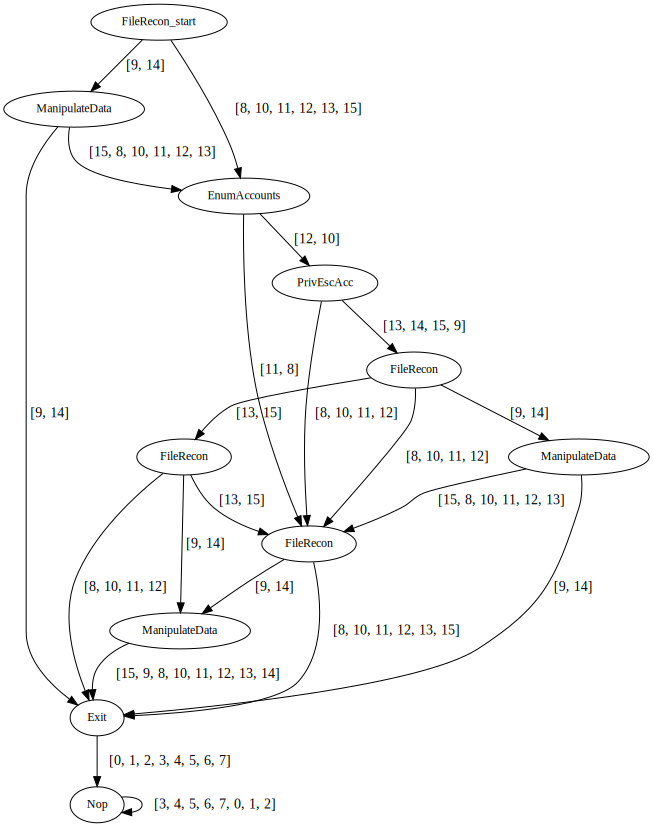

Displaying /home/ashinde/PhD/CaffineBravery/results_l1_active/361380654_attl0_pol_graph.json
Edge map is:
0:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, success), (ConnStatus, terminated)]
1:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnStatus, terminated)]
2:[(AccessPerm, denied), (HostObs, none), (ActionResult, success), (ConnStatus, terminated)]
3:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated)]
4:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success), (ConnStatus, terminated)]
5:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, terminated)]
6:[(AccessPerm, auth), (HostObs, none), (ActionResult, success), (ConnStatus, terminated)]
7:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated)]
8:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active)]
9:[(AccessPerm, auth), (HostObs, none),

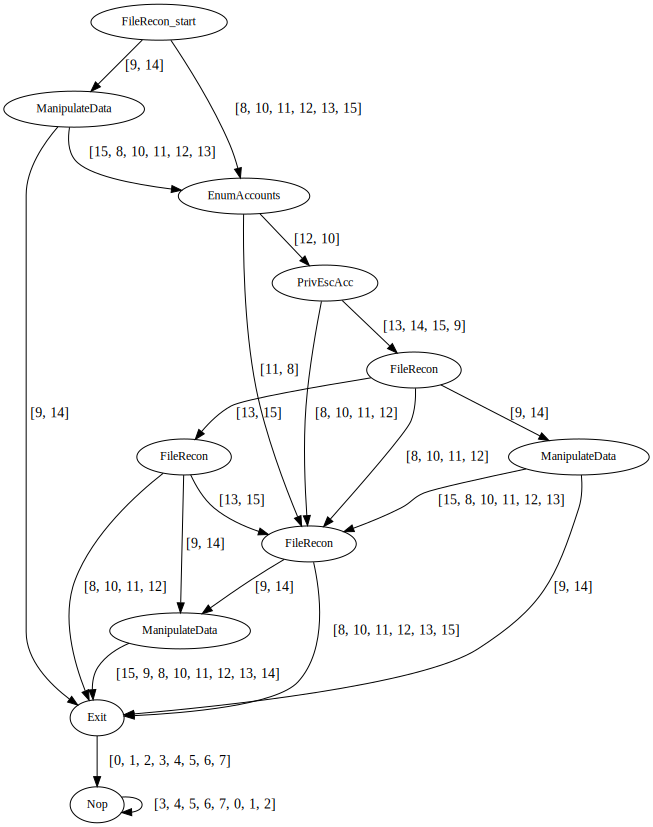

Displaying /home/ashinde/PhD/CaffineBravery/results_l1_active/793293778_defl1_active_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


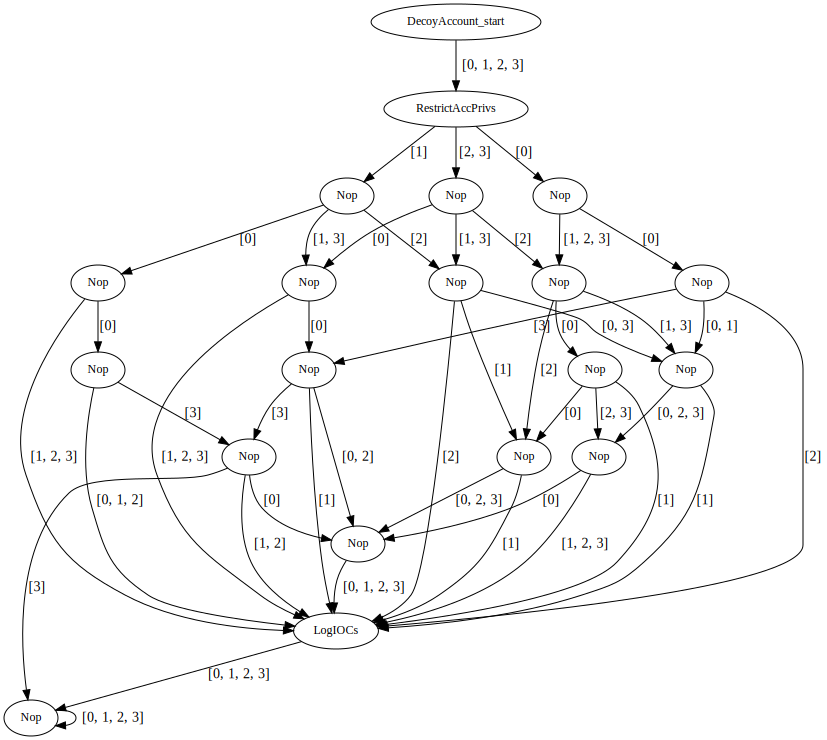

In [5]:
GRAPH_FILES = list(filter(lambda x: "pol_graph" in x.parts[-1], DATA_FILES))

for g in GRAPH_FILES:
    print(f"Displaying {g}")
    data = load_json(g)
    G = get_graphviz_graph(data)
    display(G)

---
Summarize the actual interactions

In [6]:
# Get the trace files
TRACE_FILES = list(filter(lambda x: "trace" in x.parts[-1], DATA_FILES))

for _file in TRACE_FILES:
    print(f"Using trace from {_file}")


Using trace from /home/ashinde/PhD/CaffineBravery/results_l1_active/trace.0.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l1_active/trace.1.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l1_active/trace.2.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l1_active/trace.3.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l1_active/trace.4.json


+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                   login_activity
2                               1.0                        file_enum
3                               1.0                        file_enum
4                               1.0                             none
5                               1.0                   login_activity
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                        file_enum

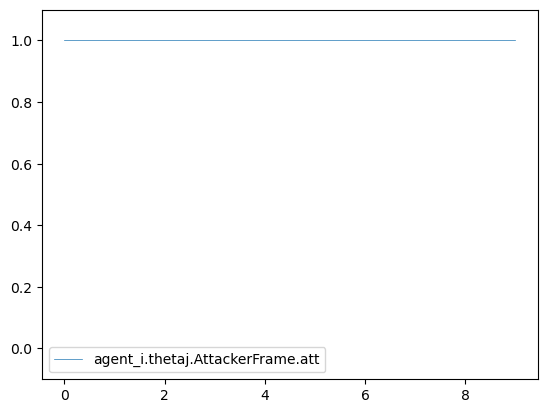

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes    agent_i.action  agent_j.action
0                  1.0                   0.0      DecoyAccount       FileRecon
1                  1.0                   0.0  RestrictAccPrivs  ManipulateData
2                  1.0                   0.0               Nop    EnumAccounts
3                  1.0                   0.0               Nop      PrivEscAcc
4                  1.0                   0.0               Nop       FileRecon
5                  1.0                   0.0               Nop  ManipulateData
6                  1.0                   0.0           LogIOCs            Exit
7                  0.0                   1.0               Nop             Nop
8                  0.0                   1.0               Nop             Nop
9                  0.0                   1.0               Nop             Nop

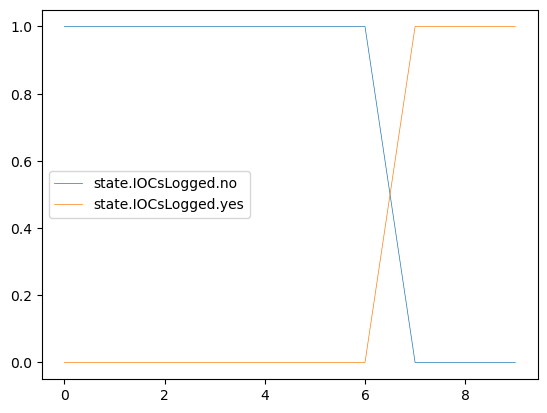

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes    agent_i.action  \
0                    1.0                     0.0      DecoyAccount   
1                    1.0                     0.0  RestrictAccPrivs   
2                    1.0                     0.0               Nop   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    1.0                     0.0               Nop   
6                    1.0                     0.0           LogIOCs   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                   login_activity  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                        file_enum  
4       FileRecon                             none  
5  ManipulateData                   login_activity  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

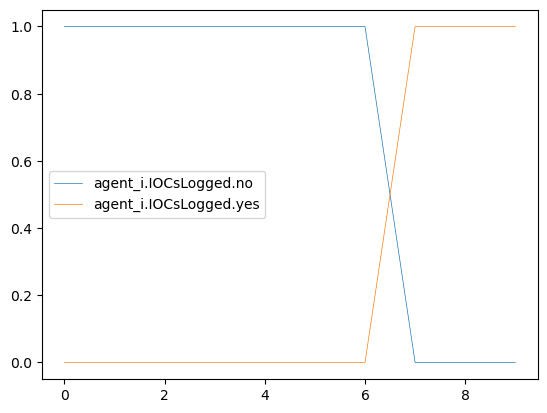

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes  agent_j.action  \
0                1.00000                 0.00000       FileRecon   
1                0.99999                 0.00001  ManipulateData   
2                0.99998                 0.00002    EnumAccounts   
3                0.99997                 0.00003      PrivEscAcc   
4                0.99996                 0.00004       FileRecon   
5                0.99995                 0.00005  ManipulateData   
6                0.99994                 0.00006            Exit   
7                0.99993                 0.00007             Nop   
8                0.99992                 0.00008             Nop   
9                0.99991                 0.00009             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6           LogIOCs                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           success   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           success   
7                   user_files                           failure   
8                         none                           failure   
9                   user_files                           success   

  agent_j.observation.ConnStatus'  
0                          active  
1                          active  
2                          active  
3                          active  
4                          active  
5                          active  
6                      terminated  
7                      terminated  
8                      terminated  
9                      terminated

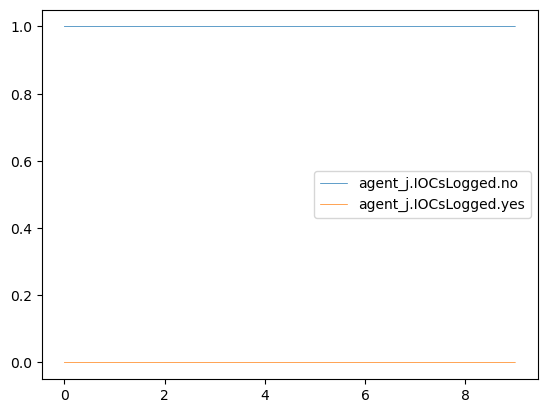

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   0.0                   1.0      DecoyAccount   
1                   0.0                   1.0  RestrictAccPrivs   
2                   1.0                   0.0               Nop   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0           LogIOCs   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

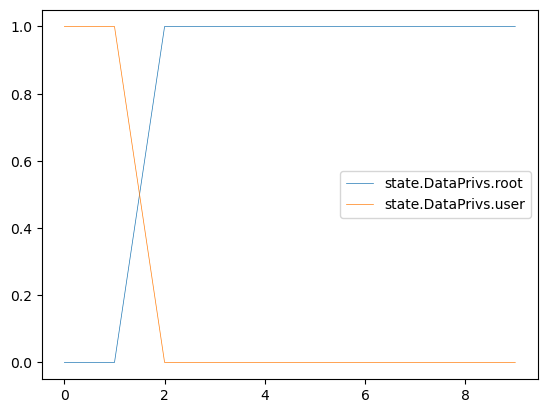

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     0.0                     1.0      DecoyAccount   
1                     0.0                     1.0  RestrictAccPrivs   
2                     1.0                     0.0               Nop   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0           LogIOCs   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                   login_activity  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                        file_enum  
4       FileRecon                             none  
5  ManipulateData                   login_activity  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

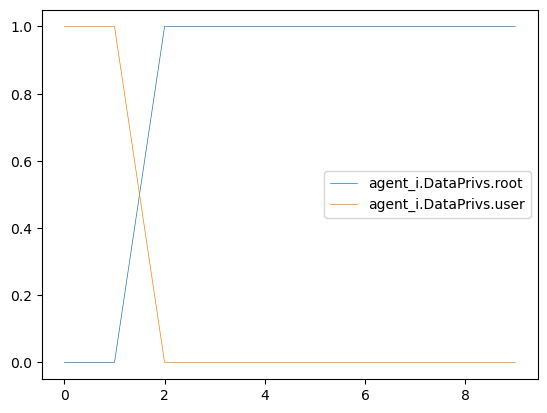

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.113638                0.886362  ManipulateData   
2                0.655943                0.344057    EnumAccounts   
3                0.655947                0.344053      PrivEscAcc   
4                0.655950                0.344050       FileRecon   
5                0.841298                0.158702  ManipulateData   
6                0.871758                0.128242            Exit   
7                0.871759                0.128241             Nop   
8                0.871760                0.128240             Nop   
9                0.871762                0.128238             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6           LogIOCs                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           success   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           success   
7                   user_files                           failure   
8                         none                           failure   
9                   user_files                           success   

  agent_j.observation.ConnStatus'  
0                          active  
1                          active  
2                          active  
3                          active  
4                          active  
5                          active  
6                      terminated  
7                      terminated  
8                      terminated  
9                      terminated

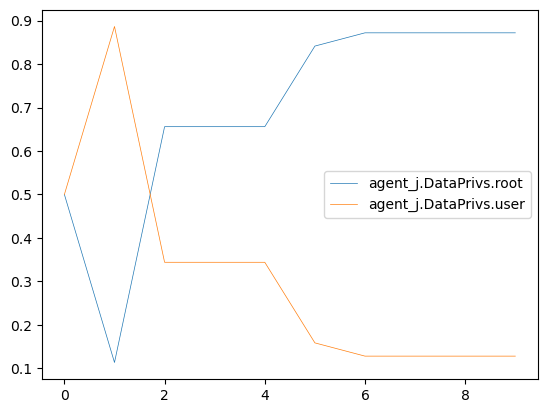

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0      DecoyAccount   
1                    1.0                     0.0  RestrictAccPrivs   
2                    0.0                     1.0               Nop   
3                    0.0                     1.0               Nop   
4                    0.0                     1.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0           LogIOCs   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

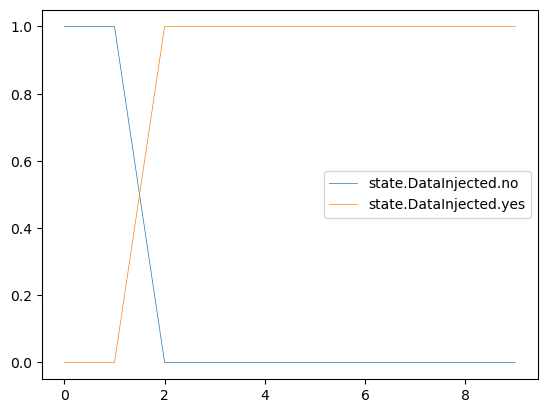

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000      DecoyAccount   
1                 1.000000                  0.000000  RestrictAccPrivs   
2                 0.280000                  0.720000               Nop   
3                 0.131210                  0.868790               Nop   
4                 0.138204                  0.861796               Nop   
5                 0.066438                  0.933562               Nop   
6                 0.062750                  0.937250           LogIOCs   
7                 0.062486                  0.937514               Nop   
8                 0.062488                  0.937512               Nop   
9                 0.062488                  0.937512               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                   login_activity  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                        file_enum  
4       FileRecon                             none  
5  ManipulateData                   login_activity  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

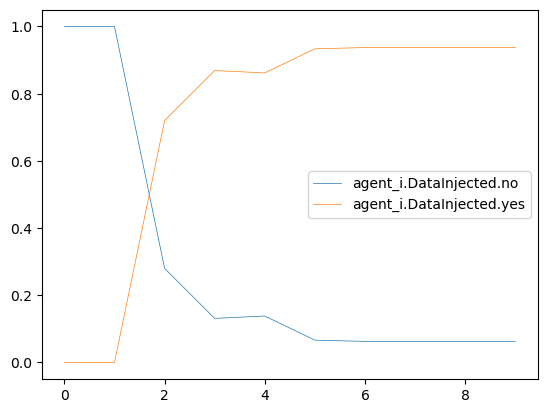

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000  ManipulateData   
2                 0.917503                  0.082497    EnumAccounts   
3                 0.917503                  0.082497      PrivEscAcc   
4                 0.917503                  0.082497       FileRecon   
5                 0.790313                  0.209687  ManipulateData   
6                 0.000050                  0.999950            Exit   
7                 0.000050                  0.999950             Nop   
8                 0.000050                  0.999950             Nop   
9                 0.000050                  0.999950             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6           LogIOCs                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           success   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           success   
7                   user_files                           failure   
8                         none                           failure   
9                   user_files                           success   

  agent_j.observation.ConnStatus'  
0                          active  
1                          active  
2                          active  
3                          active  
4                          active  
5                          active  
6                      terminated  
7                      terminated  
8                      terminated  
9                      terminated

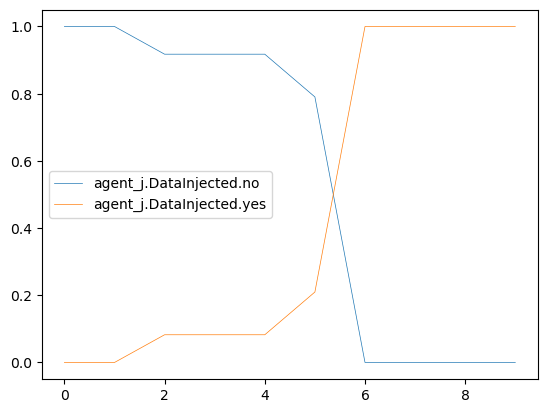

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   0.0                    1.0      DecoyAccount   
1                   0.0                    1.0  RestrictAccPrivs   
2                   0.0                    1.0               Nop   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0           LogIOCs   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

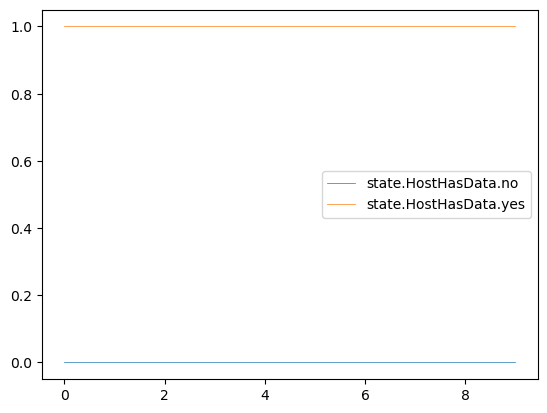

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     0.0                      1.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0           LogIOCs   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                   login_activity  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                        file_enum  
4       FileRecon                             none  
5  ManipulateData                   login_activity  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

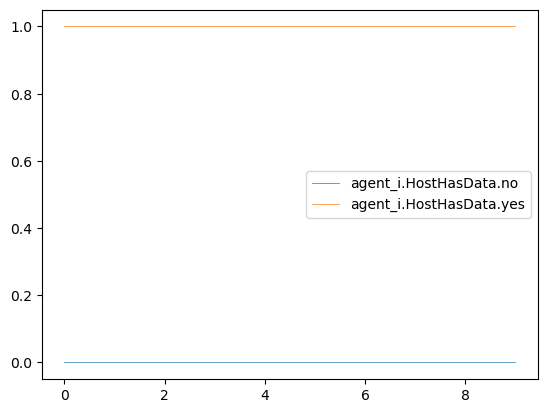

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.113637                 0.886363  ManipulateData   
2                0.573439                 0.426560    EnumAccounts   
3                0.573440                 0.426561      PrivEscAcc   
4                0.573440                 0.426561       FileRecon   
5                0.080975                 0.919025  ManipulateData   
6                0.000045                 0.999955            Exit   
7                0.000045                 0.999955             Nop   
8                0.000045                 0.999955             Nop   
9                0.000045                 0.999955             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6           LogIOCs                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           success   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           success   
7                   user_files                           failure   
8                         none                           failure   
9                   user_files                           success   

  agent_j.observation.ConnStatus'  
0                          active  
1                          active  
2                          active  
3                          active  
4                          active  
5                          active  
6                      terminated  
7                      terminated  
8                      terminated  
9                      terminated

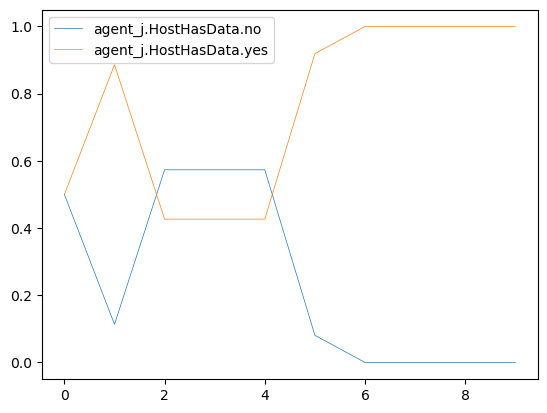

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   1.0                    0.0      DecoyAccount   
1                   0.0                    1.0  RestrictAccPrivs   
2                   0.0                    1.0               Nop   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0           LogIOCs   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

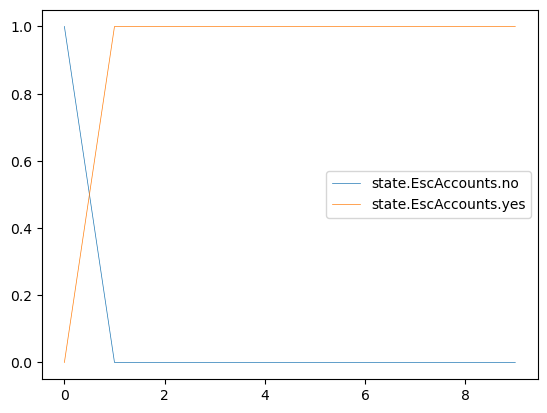

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     1.0                      0.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0           LogIOCs   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                   login_activity  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                        file_enum  
4       FileRecon                             none  
5  ManipulateData                   login_activity  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

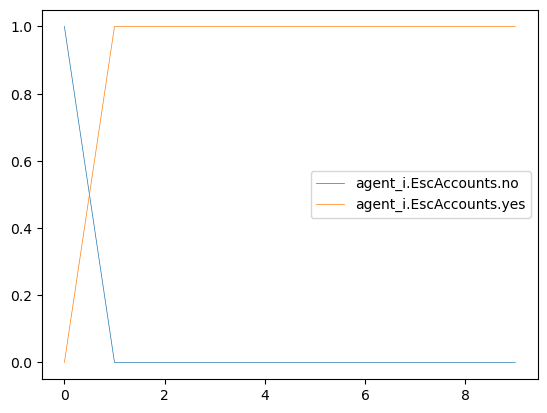

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.499995                 0.500005  ManipulateData   
2                0.499990                 0.500010    EnumAccounts   
3                0.119042                 0.880958      PrivEscAcc   
4                0.000000                 1.000000       FileRecon   
5                0.000000                 1.000000  ManipulateData   
6                0.000000                 1.000000            Exit   
7                0.000000                 1.000000             Nop   
8                0.000000                 1.000000             Nop   
9                0.000000                 1.000000             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6           LogIOCs                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           success   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           success   
7                   user_files                           failure   
8                         none                           failure   
9                   user_files                           success   

  agent_j.observation.ConnStatus'  
0                          active  
1                          active  
2                          active  
3                          active  
4                          active  
5                          active  
6                      terminated  
7                      terminated  
8                      terminated  
9                      terminated

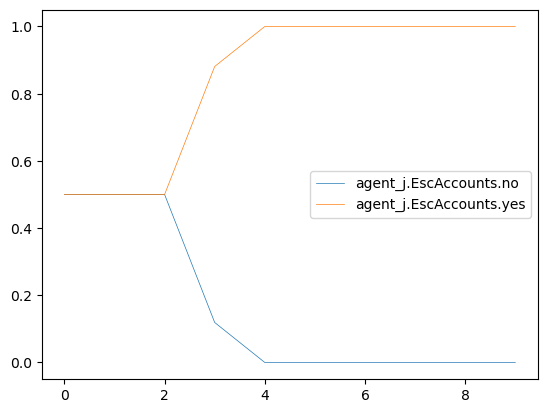

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0      DecoyAccount       FileRecon
1                 0.0                  1.0  RestrictAccPrivs  ManipulateData
2                 0.0                  1.0               Nop    EnumAccounts
3                 0.0                  1.0               Nop      PrivEscAcc
4                 0.0                  1.0               Nop       FileRecon
5                 0.0                  1.0               Nop  ManipulateData
6                 0.0                  1.0           LogIOCs            Exit
7                 0.0                  1.0               Nop             Nop
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

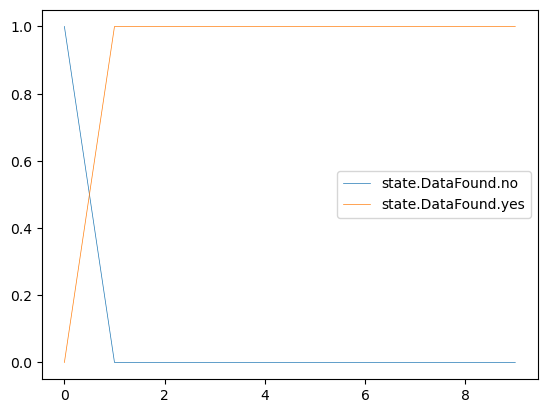

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000      DecoyAccount   
1              0.200000               0.800000  RestrictAccPrivs   
2              0.200000               0.800000               Nop   
3              0.095907               0.904093               Nop   
4              0.049630               0.950370               Nop   
5              0.047488               0.952512               Nop   
6              0.047197               0.952803           LogIOCs   
7              0.047407               0.952593               Nop   
8              0.047410               0.952590               Nop   
9              0.047410               0.952590               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                   login_activity  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                        file_enum  
4       FileRecon                             none  
5  ManipulateData                   login_activity  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

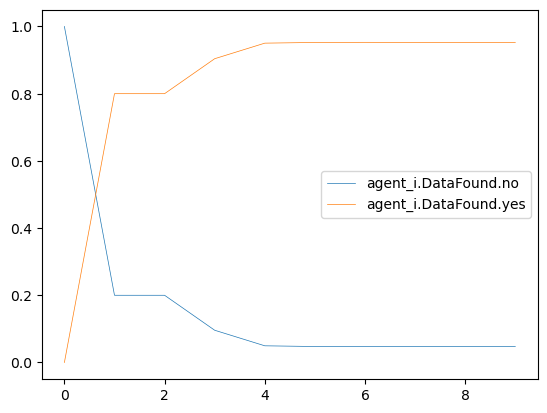

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000       FileRecon   
1              0.181820               0.818180  ManipulateData   
2              0.917503               0.082497    EnumAccounts   
3              0.917503               0.082497      PrivEscAcc   
4              0.917503               0.082497       FileRecon   
5              0.090692               0.909308  ManipulateData   
6              0.000050               0.999950            Exit   
7              0.000050               0.999950             Nop   
8              0.000050               0.999950             Nop   
9              0.000050               0.999950             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6           LogIOCs                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           success   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           success   
7                   user_files                           failure   
8                         none                           failure   
9                   user_files                           success   

  agent_j.observation.ConnStatus'  
0                          active  
1                          active  
2                          active  
3                          active  
4                          active  
5                          active  
6                      terminated  
7                      terminated  
8                      terminated  
9                      terminated

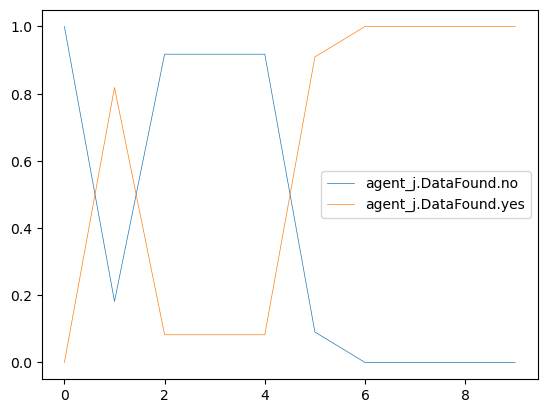

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0      DecoyAccount       FileRecon
1                 0.0                  1.0  RestrictAccPrivs  ManipulateData
2                 0.0                  1.0               Nop    EnumAccounts
3                 0.0                  1.0               Nop      PrivEscAcc
4                 0.0                  1.0               Nop       FileRecon
5                 0.0                  1.0               Nop  ManipulateData
6                 0.0                  1.0           LogIOCs            Exit
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

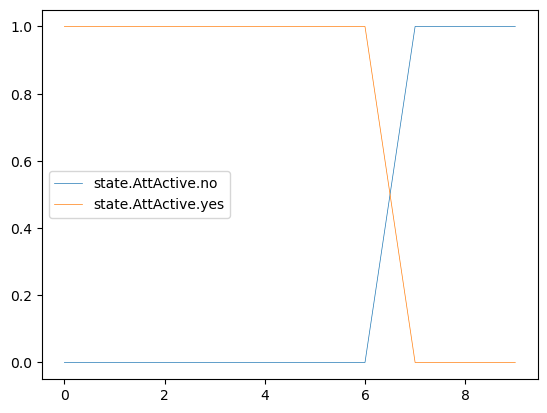

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0          0.000000e+00               1.000000      DecoyAccount   
1          0.000000e+00               1.000000  RestrictAccPrivs   
2          0.000000e+00               1.000000               Nop   
3          8.618953e-07               0.999999               Nop   
4          3.166781e-02               0.968332               Nop   
5          9.303143e-01               0.069686               Nop   
6          9.464927e-01               0.053507           LogIOCs   
7          9.992060e-01               0.000794               Nop   
8          9.999898e-01               0.000010               Nop   
9          1.000000e+00               0.000000               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                   login_activity  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                        file_enum  
4       FileRecon                             none  
5  ManipulateData                   login_activity  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

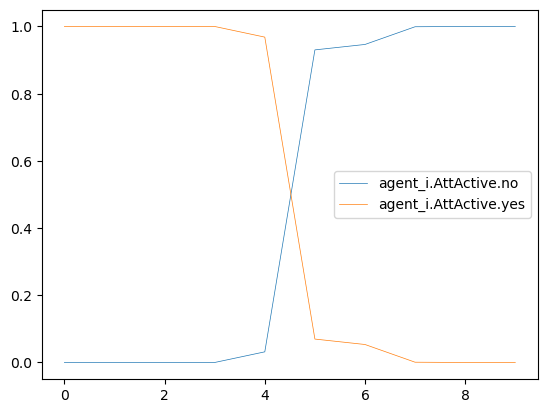

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0       FileRecon   
1                   0.0                    1.0  ManipulateData   
2                   0.0                    1.0    EnumAccounts   
3                   0.0                    1.0      PrivEscAcc   
4                   0.0                    1.0       FileRecon   
5                   0.0                    1.0  ManipulateData   
6                   0.0                    1.0            Exit   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6           LogIOCs                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           success   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           success   
7                   user_files                           failure   
8                         none                           failure   
9                   user_files                           success   

  agent_j.observation.ConnStatus'  
0                          active  
1                          active  
2                          active  
3                          active  
4                          active  
5                          active  
6                      terminated  
7                      terminated  
8                      terminated  
9                      terminated

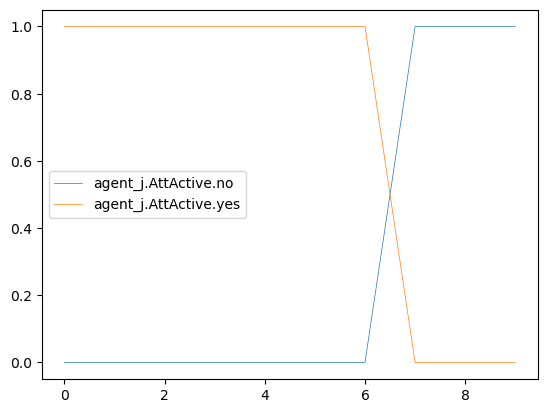

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0      DecoyAccount       FileRecon  
1                      1.0  RestrictAccPrivs  ManipulateData  
2                      1.0               Nop    EnumAccounts  
3                      1.0               Nop      PrivEscAcc  
4                      1.0               Nop       FileRecon  
5                      1.0               Nop  ManipulateData  
6                      1.0           LogIOCs            Exit  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

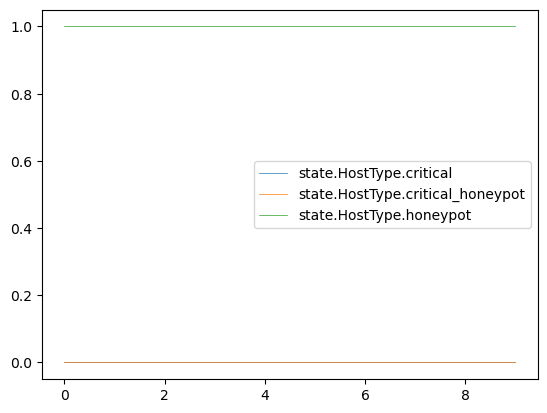

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0      DecoyAccount       FileRecon   
1                        1.0  RestrictAccPrivs  ManipulateData   
2                        1.0               Nop    EnumAccounts   
3                        1.0               Nop      PrivEscAcc   
4                        1.0               Nop       FileRecon   
5                        1.0               Nop  ManipulateData   
6                        1.0           LogIOCs            Exit   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                   login_activity  
2                        file_enum  
3                        file_enum  
4                             none  
5                   login_activity  
6                             none  
7                             none  
8                             none  
9                        file_enum

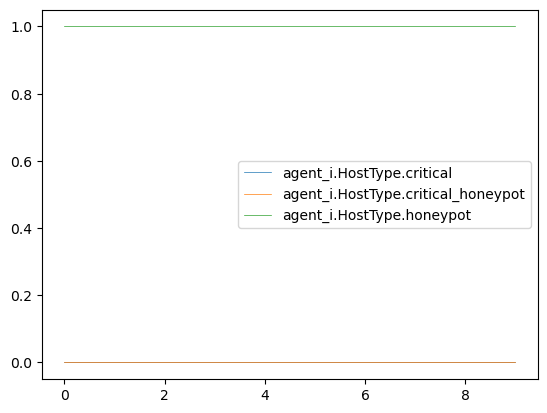

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                        0.0       FileRecon      DecoyAccount   
1                        0.0  ManipulateData  RestrictAccPrivs   
2                        0.0    EnumAccounts               Nop   
3                        0.0      PrivEscAcc               Nop   
4                        0.0       FileRecon               Nop   
5                        0.0  ManipulateData               Nop   
6                        0.0            Exit           LogIOCs   
7                        0.0             Nop               Nop   
8                        0.0             Nop               Nop   
9                        0.0             Nop               Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                   user_files   
1                          denied                   user_files   
2                          denied                   user_files   
3                            auth                         none   
4                            auth                   user_files   
5                            auth                         none   
6                          denied                   user_files   
7                            auth                   user_files   
8                            auth                         none   
9                            auth                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  
0                           success                          active  
1                           success                          active  
2                           success                          active  
3                           success                          active  
4                           success                          active  
5                           success                          active  
6                           success                      terminated  
7                           failure                      terminated  
8                           failure                      terminated  
9                           success                      terminated

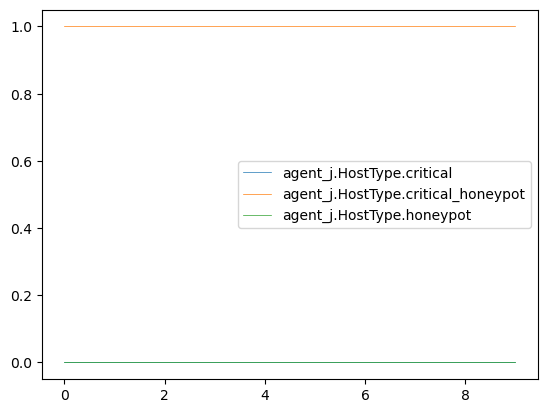

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0      DecoyAccount       FileRecon
1                1.0                 0.0  RestrictAccPrivs  ManipulateData
2                1.0                 0.0               Nop    EnumAccounts
3                0.0                 1.0               Nop      PrivEscAcc
4                0.0                 1.0               Nop       FileRecon
5                0.0                 1.0               Nop  ManipulateData
6                0.0                 1.0           LogIOCs            Exit
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

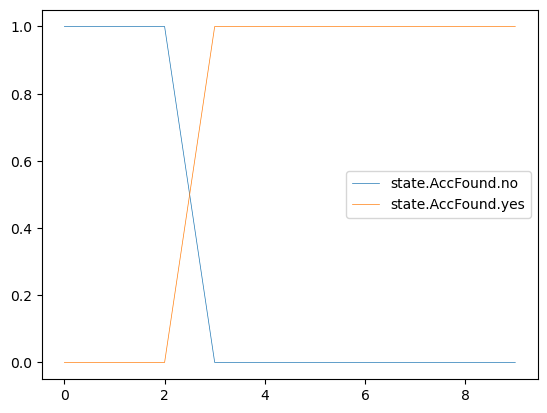

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0             1.000000              0.000000      DecoyAccount   
1             1.000000              0.000000  RestrictAccPrivs   
2             0.784000              0.216000               Nop   
3             0.235745              0.764255               Nop   
4             0.462128              0.537872               Nop   
5             0.646587              0.353413               Nop   
6             0.646587              0.353413           LogIOCs   
7             0.649668              0.350332               Nop   
8             0.649708              0.350292               Nop   
9             0.649708              0.350292               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                   login_activity  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                        file_enum  
4       FileRecon                             none  
5  ManipulateData                   login_activity  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

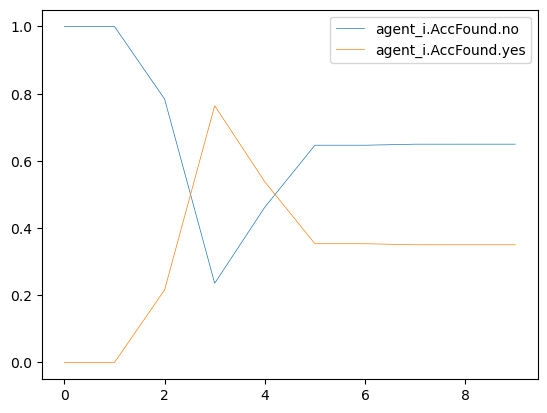

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0             1.000000              0.000000       FileRecon   
1             1.000000              0.000000  ManipulateData   
2             1.000000              0.000000    EnumAccounts   
3             0.142853              0.857147      PrivEscAcc   
4             0.000000              1.000000       FileRecon   
5             0.000000              1.000000  ManipulateData   
6             0.000000              1.000000            Exit   
7             0.000000              1.000000             Nop   
8             0.000000              1.000000             Nop   
9             0.000000              1.000000             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6           LogIOCs                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           success   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           success   
7                   user_files                           failure   
8                         none                           failure   
9                   user_files                           success   

  agent_j.observation.ConnStatus'  
0                          active  
1                          active  
2                          active  
3                          active  
4                          active  
5                          active  
6                      terminated  
7                      terminated  
8                      terminated  
9                      terminated

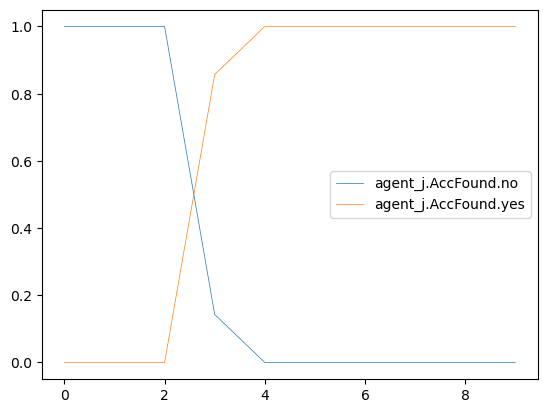

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0      DecoyAccount   
1                     0.0                     1.0  RestrictAccPrivs   
2                     0.0                     1.0               Nop   
3                     0.0                     1.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0           LogIOCs   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

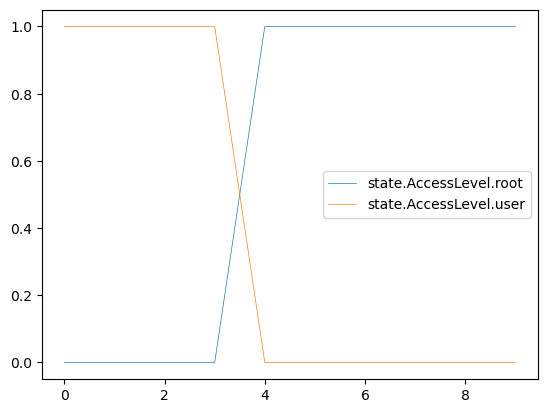

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000      DecoyAccount   
1                  0.000000                  1.000000  RestrictAccPrivs   
2                  0.000000                  1.000000               Nop   
3                  0.033510                  0.966490               Nop   
4                  0.336638                  0.663362               Nop   
5                  0.068199                  0.931801               Nop   
6                  0.068199                  0.931801           LogIOCs   
7                  0.063760                  0.936240               Nop   
8                  0.063702                  0.936298               Nop   
9                  0.063702                  0.936298               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                   login_activity  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                        file_enum  
4       FileRecon                             none  
5  ManipulateData                   login_activity  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

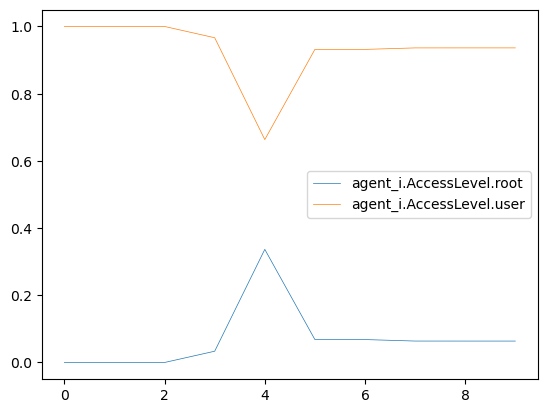

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                       0.0                       1.0       FileRecon   
1                       0.0                       1.0  ManipulateData   
2                       0.0                       1.0    EnumAccounts   
3                       0.0                       1.0      PrivEscAcc   
4                       1.0                       0.0       FileRecon   
5                       1.0                       0.0  ManipulateData   
6                       1.0                       0.0            Exit   
7                       1.0                       0.0             Nop   
8                       1.0                       0.0             Nop   
9                       1.0                       0.0             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                            auth   
6           LogIOCs                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           success   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           success   
7                   user_files                           failure   
8                         none                           failure   
9                   user_files                           success   

  agent_j.observation.ConnStatus'  
0                          active  
1                          active  
2                          active  
3                          active  
4                          active  
5                          active  
6                      terminated  
7                      terminated  
8                      terminated  
9                      terminated

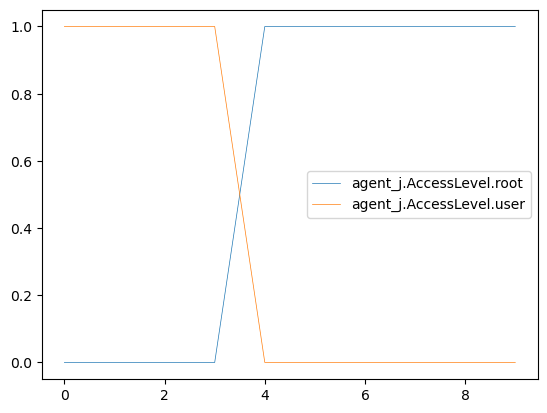

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                             none
2                               1.0                        file_enum
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                        file_enum
7                               1.0                       file_write
8                               1.0                   login_activity
9                               1.0                             none

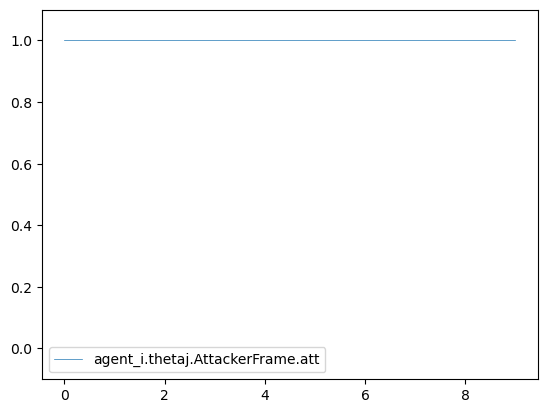

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes    agent_i.action  agent_j.action
0                  1.0                   0.0      DecoyAccount       FileRecon
1                  1.0                   0.0  RestrictAccPrivs  ManipulateData
2                  1.0                   0.0               Nop    EnumAccounts
3                  1.0                   0.0               Nop            Exit
4                  1.0                   0.0               Nop             Nop
5                  1.0                   0.0           LogIOCs             Nop
6                  0.0                   1.0               Nop             Nop
7                  0.0                   1.0               Nop             Nop
8                  0.0                   1.0               Nop             Nop
9                  0.0                   1.0               Nop             Nop

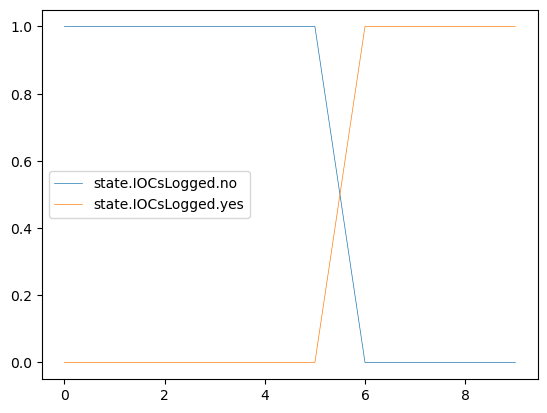

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes    agent_i.action  \
0                    1.0                     0.0      DecoyAccount   
1                    1.0                     0.0  RestrictAccPrivs   
2                    1.0                     0.0               Nop   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    1.0                     0.0           LogIOCs   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                             none  
2    EnumAccounts                        file_enum  
3            Exit                        file_enum  
4             Nop                       file_write  
5             Nop                             none  
6             Nop                        file_enum  
7             Nop                       file_write  
8             Nop                   login_activity  
9             Nop                             none

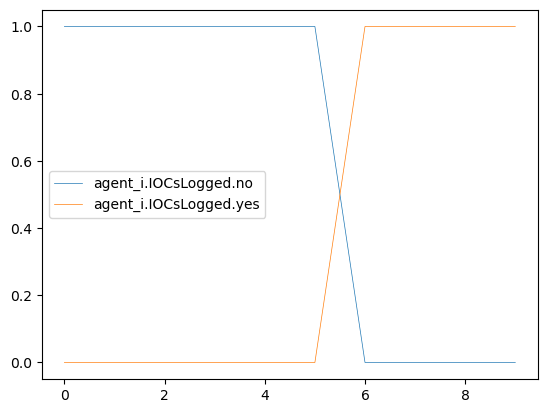

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes  agent_j.action  \
0                1.00000                 0.00000       FileRecon   
1                0.99999                 0.00001  ManipulateData   
2                0.99998                 0.00002    EnumAccounts   
3                0.99997                 0.00003            Exit   
4                0.99996                 0.00004             Nop   
5                0.99995                 0.00005             Nop   
6                0.99994                 0.00006             Nop   
7                0.99993                 0.00007             Nop   
8                0.99992                 0.00008             Nop   
9                0.99991                 0.00009             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                          denied   
4               Nop                            auth   
5           LogIOCs                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           success   
2                   user_files                           failure   
3                   user_files                           failure   
4                   user_files                           success   
5                         none                           success   
6                         none                           failure   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus'  
0                          active  
1                          active  
2                          active  
3                      terminated  
4                      terminated  
5                      terminated  
6                      terminated  
7                      terminated  
8                      terminated  
9                      terminated

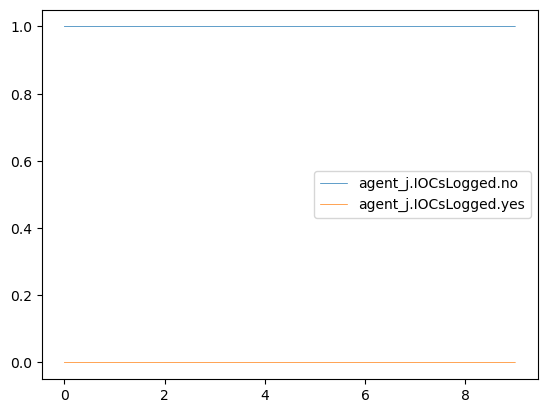

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   0.0                   1.0      DecoyAccount   
1                   0.0                   1.0  RestrictAccPrivs   
2                   1.0                   0.0               Nop   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0           LogIOCs   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3            Exit  
4             Nop  
5             Nop  
6             Nop  
7             Nop  
8             Nop  
9             Nop

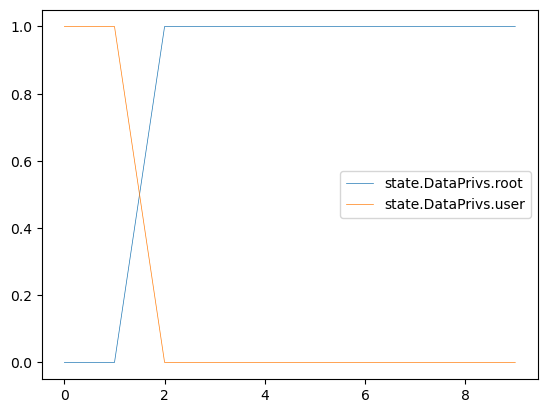

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     0.0                     1.0      DecoyAccount   
1                     0.0                     1.0  RestrictAccPrivs   
2                     1.0                     0.0               Nop   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0           LogIOCs   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                             none  
2    EnumAccounts                        file_enum  
3            Exit                        file_enum  
4             Nop                       file_write  
5             Nop                             none  
6             Nop                        file_enum  
7             Nop                       file_write  
8             Nop                   login_activity  
9             Nop                             none

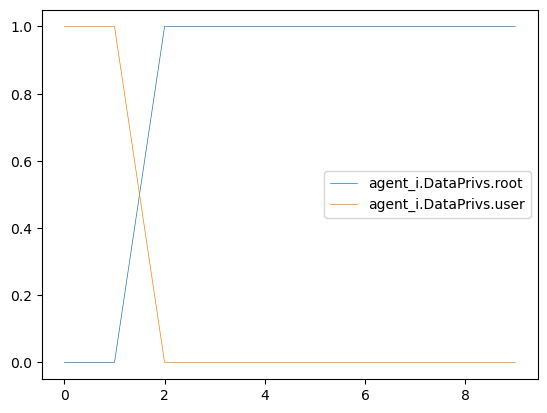

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.113638                0.886362  ManipulateData   
2                0.655943                0.344057    EnumAccounts   
3                0.655947                0.344053            Exit   
4                0.655950                0.344050             Nop   
5                0.655953                0.344046             Nop   
6                0.655957                0.344043             Nop   
7                0.655960                0.344040             Nop   
8                0.655964                0.344036             Nop   
9                0.655967                0.344033             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                          denied   
4               Nop                            auth   
5           LogIOCs                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           success   
2                   user_files                           failure   
3                   user_files                           failure   
4                   user_files                           success   
5                         none                           success   
6                         none                           failure   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus'  
0                          active  
1                          active  
2                          active  
3                      terminated  
4                      terminated  
5                      terminated  
6                      terminated  
7                      terminated  
8                      terminated  
9                      terminated

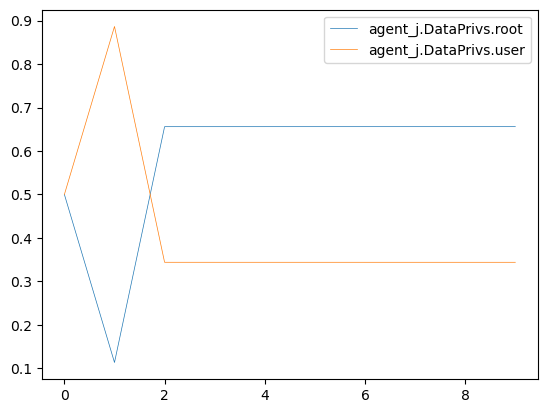

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0      DecoyAccount   
1                    1.0                     0.0  RestrictAccPrivs   
2                    0.0                     1.0               Nop   
3                    0.0                     1.0               Nop   
4                    0.0                     1.0               Nop   
5                    0.0                     1.0           LogIOCs   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3            Exit  
4             Nop  
5             Nop  
6             Nop  
7             Nop  
8             Nop  
9             Nop

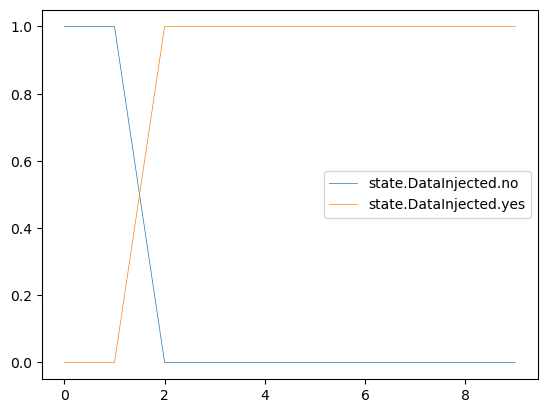

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000      DecoyAccount   
1                 1.000000                  0.000000  RestrictAccPrivs   
2                 0.280000                  0.720000               Nop   
3                 0.131210                  0.868790               Nop   
4                 0.138204                  0.861796               Nop   
5                 0.052381                  0.947619           LogIOCs   
6                 0.042027                  0.957974               Nop   
7                 0.041380                  0.958620               Nop   
8                 0.040804                  0.959196               Nop   
9                 0.040804                  0.959196               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                             none  
2    EnumAccounts                        file_enum  
3            Exit                        file_enum  
4             Nop                       file_write  
5             Nop                             none  
6             Nop                        file_enum  
7             Nop                       file_write  
8             Nop                   login_activity  
9             Nop                             none

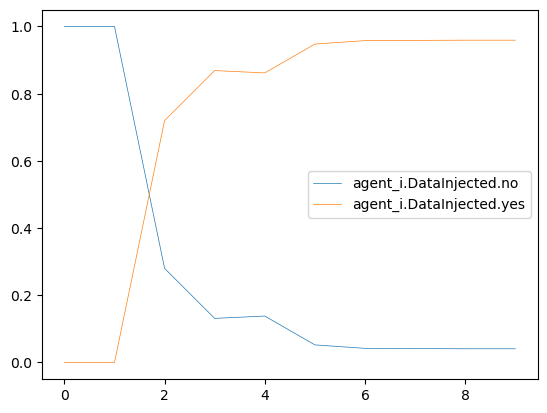

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000  ManipulateData   
2                 0.917503                  0.082497    EnumAccounts   
3                 0.917503                  0.082497            Exit   
4                 0.917503                  0.082497             Nop   
5                 0.917503                  0.082497             Nop   
6                 0.917503                  0.082497             Nop   
7                 0.917503                  0.082497             Nop   
8                 0.917503                  0.082497             Nop   
9                 0.917503                  0.082497             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                          denied   
4               Nop                            auth   
5           LogIOCs                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           success   
2                   user_files                           failure   
3                   user_files                           failure   
4                   user_files                           success   
5                         none                           success   
6                         none                           failure   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus'  
0                          active  
1                          active  
2                          active  
3                      terminated  
4                      terminated  
5                      terminated  
6                      terminated  
7                      terminated  
8                      terminated  
9                      terminated

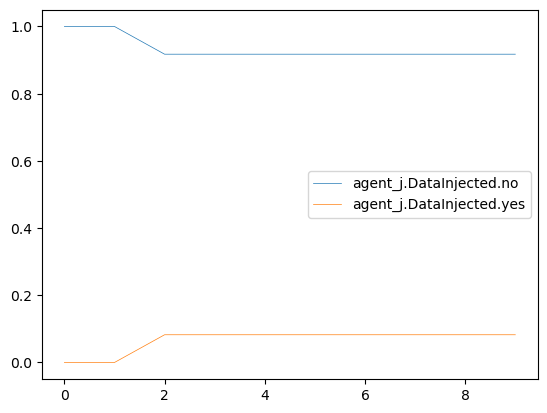

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   0.0                    1.0      DecoyAccount   
1                   0.0                    1.0  RestrictAccPrivs   
2                   0.0                    1.0               Nop   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0           LogIOCs   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3            Exit  
4             Nop  
5             Nop  
6             Nop  
7             Nop  
8             Nop  
9             Nop

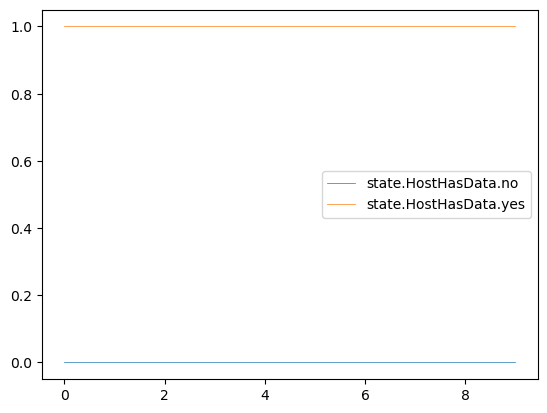

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     0.0                      1.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0           LogIOCs   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                             none  
2    EnumAccounts                        file_enum  
3            Exit                        file_enum  
4             Nop                       file_write  
5             Nop                             none  
6             Nop                        file_enum  
7             Nop                       file_write  
8             Nop                   login_activity  
9             Nop                             none

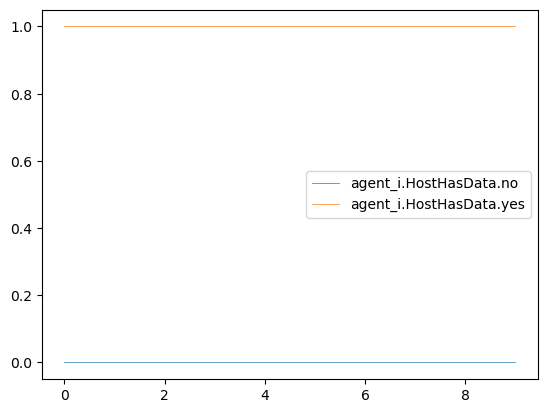

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.113637                 0.886363  ManipulateData   
2                0.573439                 0.426560    EnumAccounts   
3                0.573440                 0.426561            Exit   
4                0.573439                 0.426561             Nop   
5                0.573439                 0.426561             Nop   
6                0.573439                 0.426561             Nop   
7                0.573439                 0.426561             Nop   
8                0.573439                 0.426561             Nop   
9                0.573439                 0.426561             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                          denied   
4               Nop                            auth   
5           LogIOCs                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           success   
2                   user_files                           failure   
3                   user_files                           failure   
4                   user_files                           success   
5                         none                           success   
6                         none                           failure   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus'  
0                          active  
1                          active  
2                          active  
3                      terminated  
4                      terminated  
5                      terminated  
6                      terminated  
7                      terminated  
8                      terminated  
9                      terminated

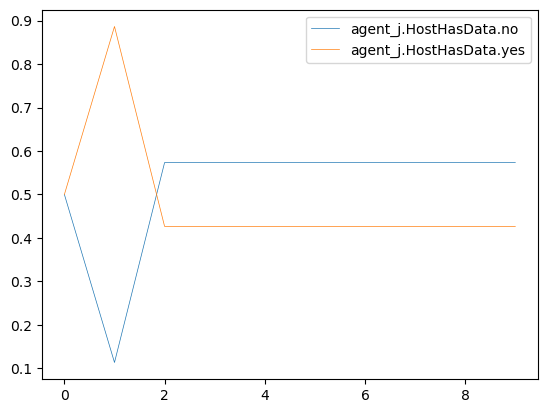

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   1.0                    0.0      DecoyAccount   
1                   0.0                    1.0  RestrictAccPrivs   
2                   0.0                    1.0               Nop   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0           LogIOCs   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3            Exit  
4             Nop  
5             Nop  
6             Nop  
7             Nop  
8             Nop  
9             Nop

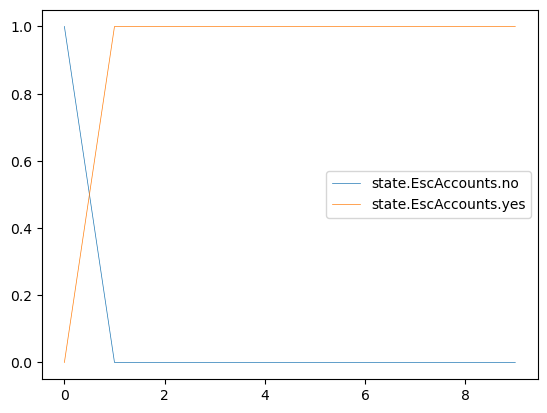

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     1.0                      0.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0           LogIOCs   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                             none  
2    EnumAccounts                        file_enum  
3            Exit                        file_enum  
4             Nop                       file_write  
5             Nop                             none  
6             Nop                        file_enum  
7             Nop                       file_write  
8             Nop                   login_activity  
9             Nop                             none

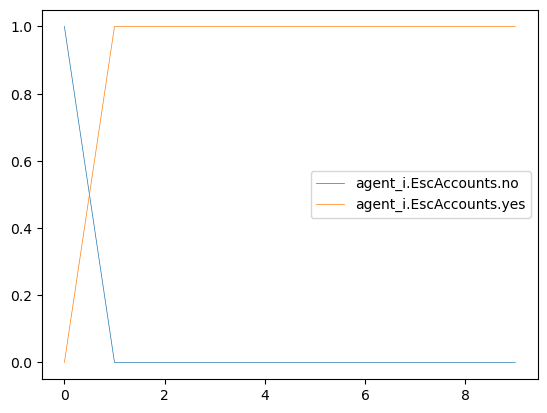

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.499995                 0.500005  ManipulateData   
2                0.499990                 0.500010    EnumAccounts   
3                0.775847                 0.224153            Exit   
4                0.775840                 0.224160             Nop   
5                0.775832                 0.224168             Nop   
6                0.775824                 0.224176             Nop   
7                0.775816                 0.224184             Nop   
8                0.775809                 0.224191             Nop   
9                0.775801                 0.224199             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                          denied   
4               Nop                            auth   
5           LogIOCs                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           success   
2                   user_files                           failure   
3                   user_files                           failure   
4                   user_files                           success   
5                         none                           success   
6                         none                           failure   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus'  
0                          active  
1                          active  
2                          active  
3                      terminated  
4                      terminated  
5                      terminated  
6                      terminated  
7                      terminated  
8                      terminated  
9                      terminated

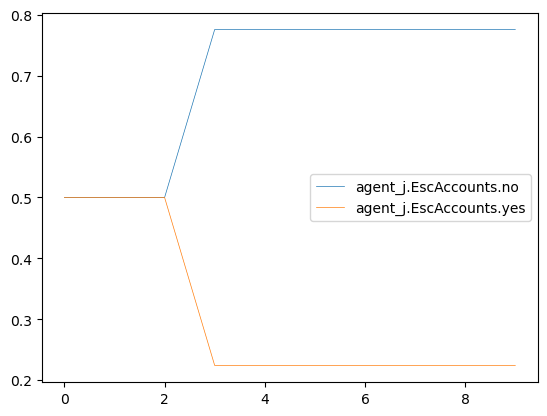

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0      DecoyAccount       FileRecon
1                 0.0                  1.0  RestrictAccPrivs  ManipulateData
2                 0.0                  1.0               Nop    EnumAccounts
3                 0.0                  1.0               Nop            Exit
4                 0.0                  1.0               Nop             Nop
5                 0.0                  1.0           LogIOCs             Nop
6                 0.0                  1.0               Nop             Nop
7                 0.0                  1.0               Nop             Nop
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

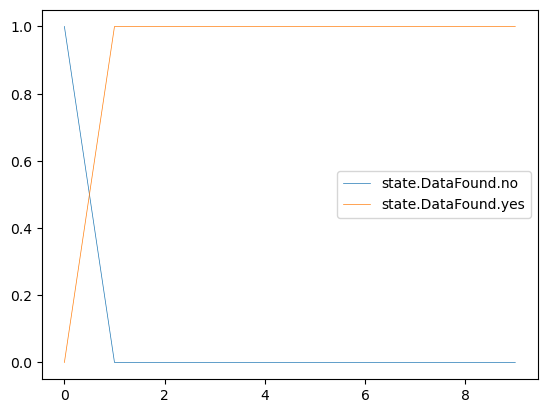

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000      DecoyAccount   
1              0.200000               0.800000  RestrictAccPrivs   
2              0.200000               0.800000               Nop   
3              0.095907               0.904093               Nop   
4              0.049630               0.950370               Nop   
5              0.030895               0.969105           LogIOCs   
6              0.032145               0.967855               Nop   
7              0.032085               0.967916               Nop   
8              0.031696               0.968304               Nop   
9              0.031696               0.968304               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                             none  
2    EnumAccounts                        file_enum  
3            Exit                        file_enum  
4             Nop                       file_write  
5             Nop                             none  
6             Nop                        file_enum  
7             Nop                       file_write  
8             Nop                   login_activity  
9             Nop                             none

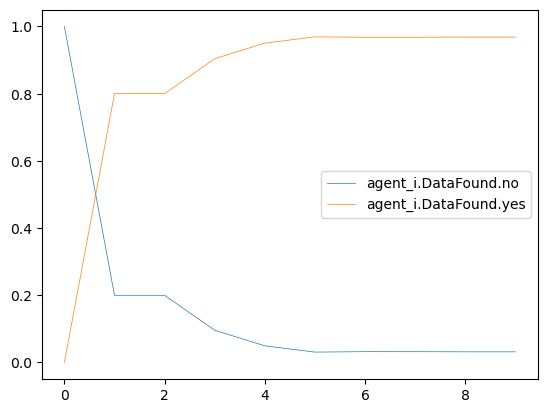

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000       FileRecon   
1              0.181820               0.818180  ManipulateData   
2              0.917503               0.082497    EnumAccounts   
3              0.917503               0.082497            Exit   
4              0.917503               0.082497             Nop   
5              0.917503               0.082497             Nop   
6              0.917503               0.082497             Nop   
7              0.917503               0.082497             Nop   
8              0.917503               0.082497             Nop   
9              0.917503               0.082497             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                          denied   
4               Nop                            auth   
5           LogIOCs                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           success   
2                   user_files                           failure   
3                   user_files                           failure   
4                   user_files                           success   
5                         none                           success   
6                         none                           failure   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus'  
0                          active  
1                          active  
2                          active  
3                      terminated  
4                      terminated  
5                      terminated  
6                      terminated  
7                      terminated  
8                      terminated  
9                      terminated

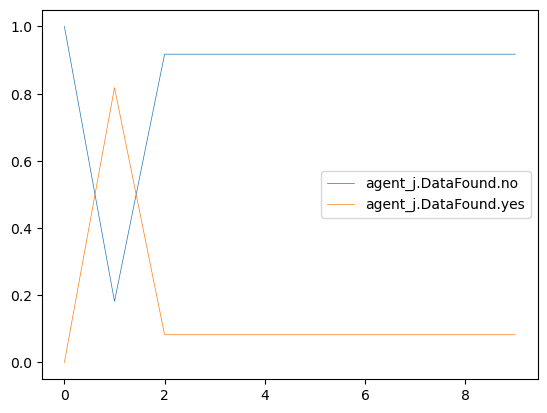

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0      DecoyAccount       FileRecon
1                 0.0                  1.0  RestrictAccPrivs  ManipulateData
2                 0.0                  1.0               Nop    EnumAccounts
3                 0.0                  1.0               Nop            Exit
4                 1.0                  0.0               Nop             Nop
5                 1.0                  0.0           LogIOCs             Nop
6                 1.0                  0.0               Nop             Nop
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

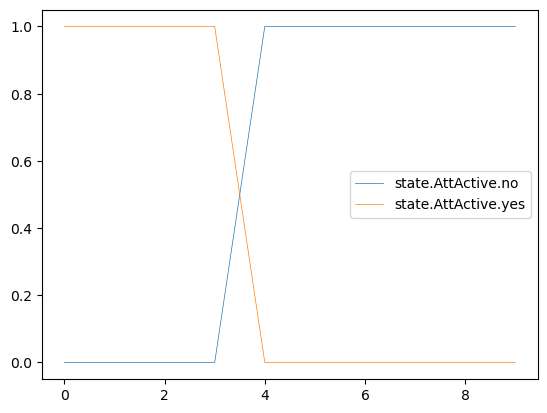

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0          0.000000e+00               1.000000      DecoyAccount   
1          0.000000e+00               1.000000  RestrictAccPrivs   
2          0.000000e+00               1.000000               Nop   
3          8.618953e-07               0.999999               Nop   
4          3.166781e-02               0.968332               Nop   
5          4.591857e-01               0.540814           LogIOCs   
6          9.680138e-01               0.031986               Nop   
7          9.944067e-01               0.005593               Nop   
8          9.857767e-01               0.014223               Nop   
9          1.000000e+00               0.000000               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                             none  
2    EnumAccounts                        file_enum  
3            Exit                        file_enum  
4             Nop                       file_write  
5             Nop                             none  
6             Nop                        file_enum  
7             Nop                       file_write  
8             Nop                   login_activity  
9             Nop                             none

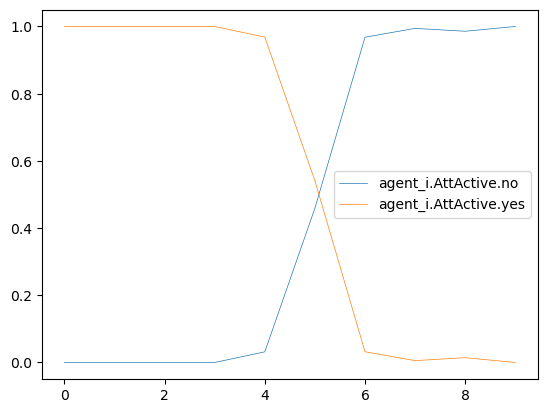

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0       FileRecon   
1                   0.0                    1.0  ManipulateData   
2                   0.0                    1.0    EnumAccounts   
3                   0.0                    1.0            Exit   
4                   1.0                    0.0             Nop   
5                   1.0                    0.0             Nop   
6                   1.0                    0.0             Nop   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                          denied   
4               Nop                            auth   
5           LogIOCs                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           success   
2                   user_files                           failure   
3                   user_files                           failure   
4                   user_files                           success   
5                         none                           success   
6                         none                           failure   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus'  
0                          active  
1                          active  
2                          active  
3                      terminated  
4                      terminated  
5                      terminated  
6                      terminated  
7                      terminated  
8                      terminated  
9                      terminated

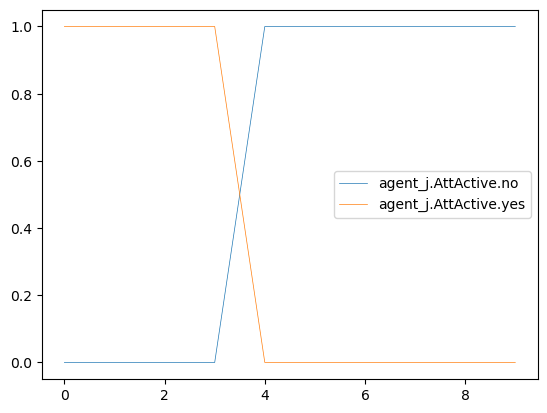

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0      DecoyAccount       FileRecon  
1                      1.0  RestrictAccPrivs  ManipulateData  
2                      1.0               Nop    EnumAccounts  
3                      1.0               Nop            Exit  
4                      1.0               Nop             Nop  
5                      1.0           LogIOCs             Nop  
6                      1.0               Nop             Nop  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

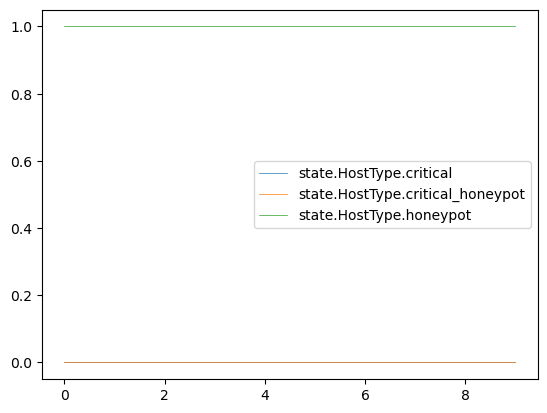

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0      DecoyAccount       FileRecon   
1                        1.0  RestrictAccPrivs  ManipulateData   
2                        1.0               Nop    EnumAccounts   
3                        1.0               Nop            Exit   
4                        1.0               Nop             Nop   
5                        1.0           LogIOCs             Nop   
6                        1.0               Nop             Nop   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                        file_enum  
3                        file_enum  
4                       file_write  
5                             none  
6                        file_enum  
7                       file_write  
8                   login_activity  
9                             none

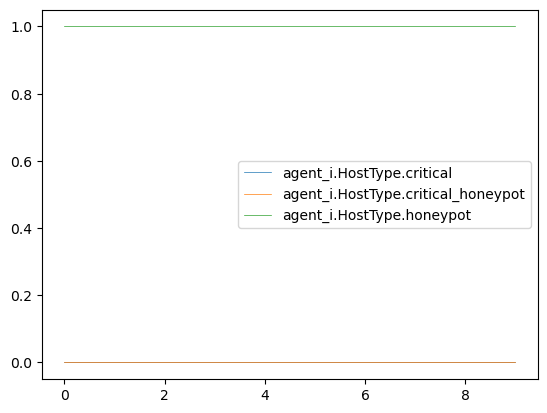

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                        0.0       FileRecon      DecoyAccount   
1                        0.0  ManipulateData  RestrictAccPrivs   
2                        0.0    EnumAccounts               Nop   
3                        0.0            Exit               Nop   
4                        0.0             Nop               Nop   
5                        0.0             Nop           LogIOCs   
6                        0.0             Nop               Nop   
7                        0.0             Nop               Nop   
8                        0.0             Nop               Nop   
9                        0.0             Nop               Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                   user_files   
1                          denied                   user_files   
2                          denied                   user_files   
3                          denied                   user_files   
4                            auth                   user_files   
5                            auth                         none   
6                          denied                         none   
7                            auth                         none   
8                            auth                         none   
9                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  
0                           success                          active  
1                           success                          active  
2                           failure                          active  
3                           failure                      terminated  
4                           success                      terminated  
5                           success                      terminated  
6                           failure                      terminated  
7                           success                      terminated  
8                           failure                      terminated  
9                           failure                      terminated

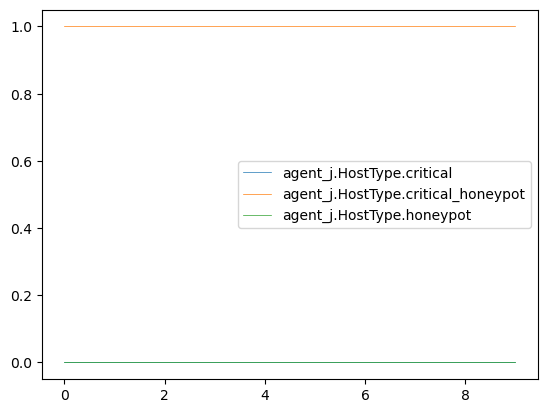

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0      DecoyAccount       FileRecon
1                1.0                 0.0  RestrictAccPrivs  ManipulateData
2                1.0                 0.0               Nop    EnumAccounts
3                0.0                 1.0               Nop            Exit
4                0.0                 1.0               Nop             Nop
5                0.0                 1.0           LogIOCs             Nop
6                0.0                 1.0               Nop             Nop
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

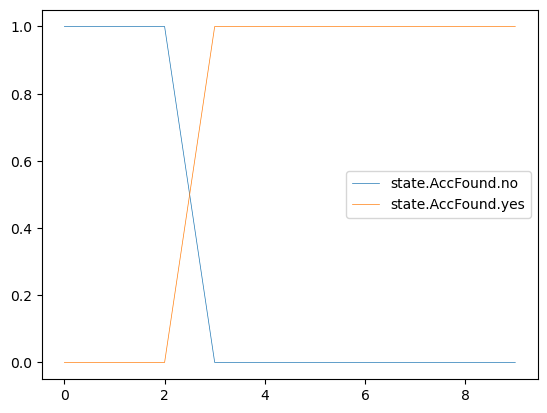

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0             1.000000              0.000000      DecoyAccount   
1             1.000000              0.000000  RestrictAccPrivs   
2             0.784000              0.216000               Nop   
3             0.235745              0.764255               Nop   
4             0.462128              0.537872               Nop   
5             0.325078              0.674922           LogIOCs   
6             0.387463              0.612537               Nop   
7             0.386701              0.613299               Nop   
8             0.381987              0.618013               Nop   
9             0.381987              0.618013               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                             none  
2    EnumAccounts                        file_enum  
3            Exit                        file_enum  
4             Nop                       file_write  
5             Nop                             none  
6             Nop                        file_enum  
7             Nop                       file_write  
8             Nop                   login_activity  
9             Nop                             none

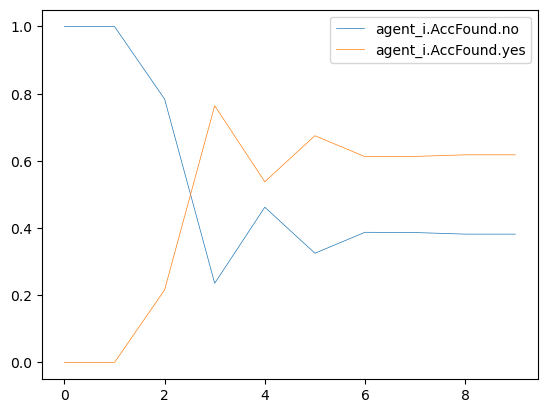

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0             1.000000              0.000000       FileRecon   
1             1.000000              0.000000  ManipulateData   
2             1.000000              0.000000    EnumAccounts   
3             0.931032              0.068968            Exit   
4             0.931032              0.068968             Nop   
5             0.931032              0.068968             Nop   
6             0.931032              0.068968             Nop   
7             0.931032              0.068968             Nop   
8             0.931032              0.068968             Nop   
9             0.931032              0.068968             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                          denied   
4               Nop                            auth   
5           LogIOCs                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           success   
2                   user_files                           failure   
3                   user_files                           failure   
4                   user_files                           success   
5                         none                           success   
6                         none                           failure   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus'  
0                          active  
1                          active  
2                          active  
3                      terminated  
4                      terminated  
5                      terminated  
6                      terminated  
7                      terminated  
8                      terminated  
9                      terminated

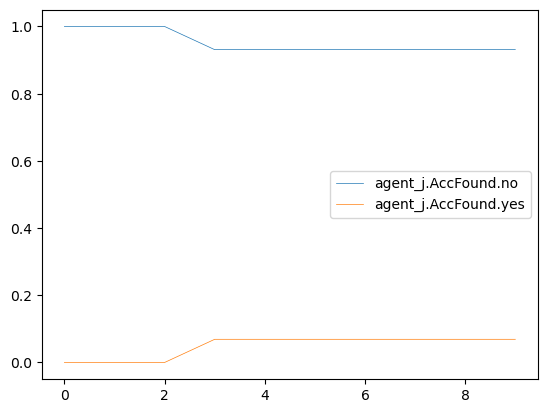

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0      DecoyAccount   
1                     0.0                     1.0  RestrictAccPrivs   
2                     0.0                     1.0               Nop   
3                     0.0                     1.0               Nop   
4                     0.0                     1.0               Nop   
5                     0.0                     1.0           LogIOCs   
6                     0.0                     1.0               Nop   
7                     0.0                     1.0               Nop   
8                     0.0                     1.0               Nop   
9                     0.0                     1.0               Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3            Exit  
4             Nop  
5             Nop  
6             Nop  
7             Nop  
8             Nop  
9             Nop

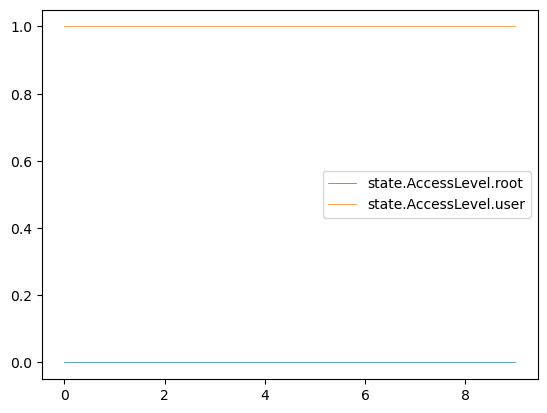

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000      DecoyAccount   
1                  0.000000                  1.000000  RestrictAccPrivs   
2                  0.000000                  1.000000               Nop   
3                  0.033510                  0.966490               Nop   
4                  0.336638                  0.663362               Nop   
5                  0.533517                  0.466483           LogIOCs   
6                  0.443995                  0.556006               Nop   
7                  0.445088                  0.554912               Nop   
8                  0.451854                  0.548147               Nop   
9                  0.451853                  0.548147               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                             none  
2    EnumAccounts                        file_enum  
3            Exit                        file_enum  
4             Nop                       file_write  
5             Nop                             none  
6             Nop                        file_enum  
7             Nop                       file_write  
8             Nop                   login_activity  
9             Nop                             none

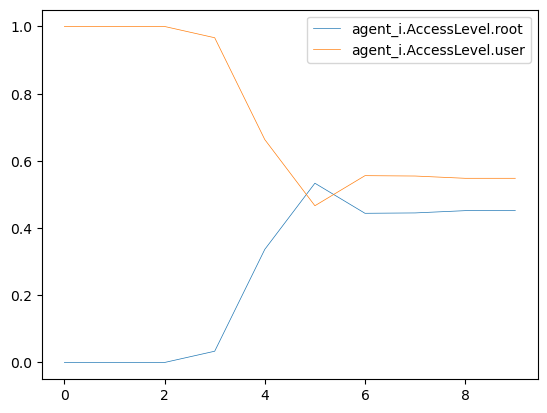

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                       0.0                       1.0       FileRecon   
1                       0.0                       1.0  ManipulateData   
2                       0.0                       1.0    EnumAccounts   
3                       0.0                       1.0            Exit   
4                       0.0                       1.0             Nop   
5                       0.0                       1.0             Nop   
6                       0.0                       1.0             Nop   
7                       0.0                       1.0             Nop   
8                       0.0                       1.0             Nop   
9                       0.0                       1.0             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                          denied   
4               Nop                            auth   
5           LogIOCs                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           success   
2                   user_files                           failure   
3                   user_files                           failure   
4                   user_files                           success   
5                         none                           success   
6                         none                           failure   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus'  
0                          active  
1                          active  
2                          active  
3                      terminated  
4                      terminated  
5                      terminated  
6                      terminated  
7                      terminated  
8                      terminated  
9                      terminated

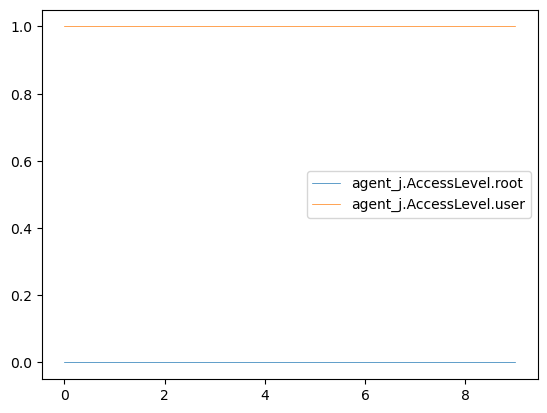

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                   login_activity
1                               1.0                   login_activity
2                               1.0                        file_enum
3                               1.0                   login_activity
4                               1.0                             none
5                               1.0                       file_write
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

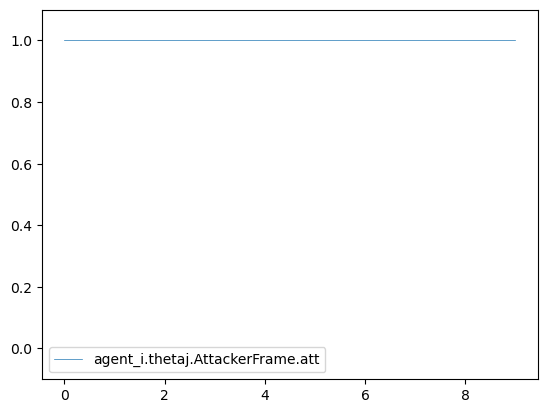

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes    agent_i.action  agent_j.action
0                  1.0                   0.0      DecoyAccount       FileRecon
1                  1.0                   0.0  RestrictAccPrivs  ManipulateData
2                  1.0                   0.0               Nop    EnumAccounts
3                  1.0                   0.0               Nop      PrivEscAcc
4                  1.0                   0.0           LogIOCs       FileRecon
5                  0.0                   1.0               Nop  ManipulateData
6                  0.0                   1.0               Nop            Exit
7                  0.0                   1.0               Nop             Nop
8                  0.0                   1.0               Nop             Nop
9                  0.0                   1.0               Nop             Nop

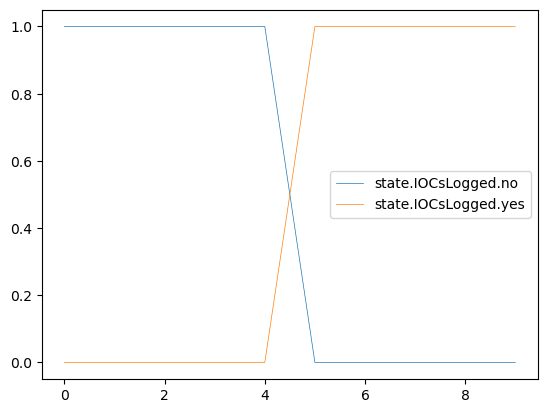

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes    agent_i.action  \
0                    1.0                     0.0      DecoyAccount   
1                    1.0                     0.0  RestrictAccPrivs   
2                    1.0                     0.0               Nop   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0           LogIOCs   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                   login_activity  
1  ManipulateData                   login_activity  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                             none  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

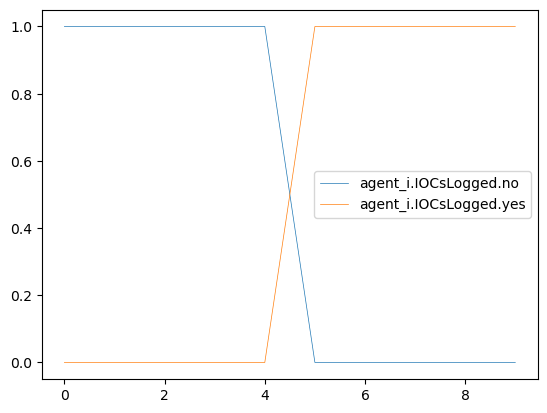

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes  agent_j.action  \
0                1.00000                 0.00000       FileRecon   
1                0.99999                 0.00001  ManipulateData   
2                0.99998                 0.00002    EnumAccounts   
3                0.99997                 0.00003      PrivEscAcc   
4                0.99996                 0.00004       FileRecon   
5                0.99995                 0.00005  ManipulateData   
6                0.99994                 0.00006            Exit   
7                0.99993                 0.00007             Nop   
8                0.99992                 0.00008             Nop   
9                0.99991                 0.00009             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4           LogIOCs                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                         none                           success   
2                   user_files                           success   
3                         none                           failure   
4                   user_files                           success   
5                   user_files                           success   
6                   user_files                           success   
7                         none                           success   
8                   user_files                           failure   
9                   user_files                           failure   

  agent_j.observation.ConnStatus'  
0                          active  
1                          active  
2                          active  
3                          active  
4                          active  
5                          active  
6                      terminated  
7                      terminated  
8                      terminated  
9                      terminated

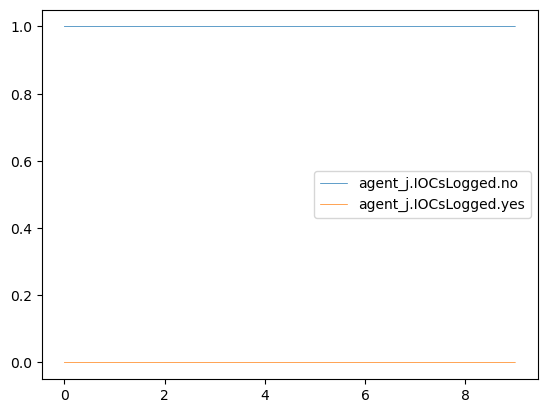

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   0.0                   1.0      DecoyAccount   
1                   0.0                   1.0  RestrictAccPrivs   
2                   1.0                   0.0               Nop   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0           LogIOCs   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

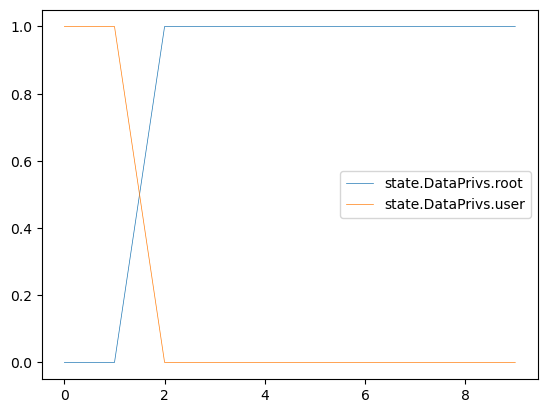

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     0.0                     1.0      DecoyAccount   
1                     0.0                     1.0  RestrictAccPrivs   
2                     1.0                     0.0               Nop   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0           LogIOCs   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                   login_activity  
1  ManipulateData                   login_activity  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                             none  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

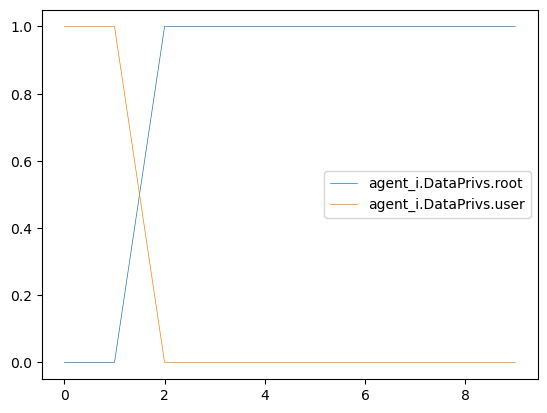

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.113638                0.886362  ManipulateData   
2                0.655943                0.344057    EnumAccounts   
3                0.655947                0.344053      PrivEscAcc   
4                0.655950                0.344050       FileRecon   
5                0.841298                0.158702  ManipulateData   
6                0.871758                0.128242            Exit   
7                0.871759                0.128241             Nop   
8                0.871760                0.128240             Nop   
9                0.871762                0.128238             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4           LogIOCs                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                         none                           success   
2                   user_files                           success   
3                         none                           failure   
4                   user_files                           success   
5                   user_files                           success   
6                   user_files                           success   
7                         none                           success   
8                   user_files                           failure   
9                   user_files                           failure   

  agent_j.observation.ConnStatus'  
0                          active  
1                          active  
2                          active  
3                          active  
4                          active  
5                          active  
6                      terminated  
7                      terminated  
8                      terminated  
9                      terminated

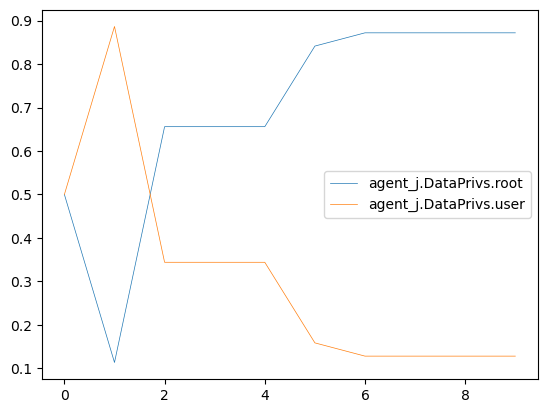

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0      DecoyAccount   
1                    1.0                     0.0  RestrictAccPrivs   
2                    0.0                     1.0               Nop   
3                    0.0                     1.0               Nop   
4                    0.0                     1.0           LogIOCs   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

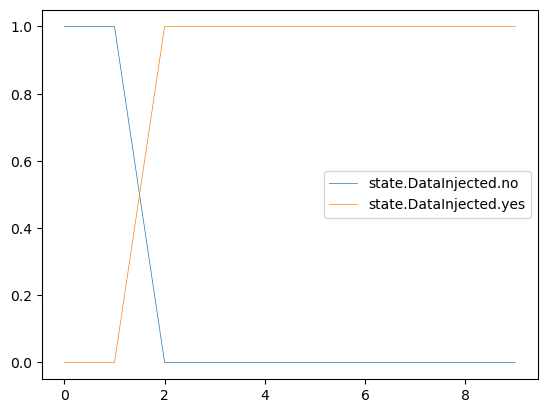

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000      DecoyAccount   
1                 1.000000                  0.000000  RestrictAccPrivs   
2                 0.280000                  0.720000               Nop   
3                 0.131210                  0.868790               Nop   
4                 0.037622                  0.962378           LogIOCs   
5                 0.101555                  0.898445               Nop   
6                 0.020986                  0.979015               Nop   
7                 0.020667                  0.979332               Nop   
8                 0.020653                  0.979347               Nop   
9                 0.020653                  0.979347               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                   login_activity  
1  ManipulateData                   login_activity  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                             none  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

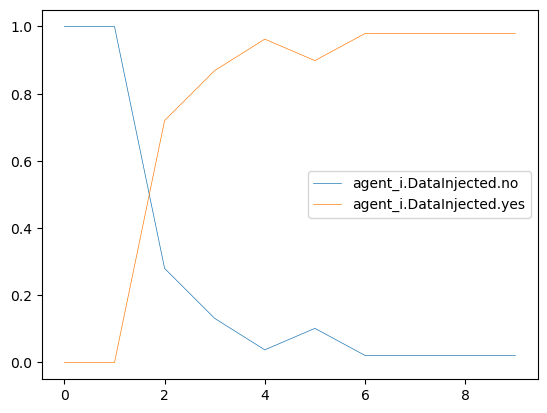

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000  ManipulateData   
2                 0.917503                  0.082497    EnumAccounts   
3                 0.917503                  0.082497      PrivEscAcc   
4                 0.917503                  0.082497       FileRecon   
5                 0.790313                  0.209687  ManipulateData   
6                 0.000050                  0.999950            Exit   
7                 0.000050                  0.999950             Nop   
8                 0.000050                  0.999950             Nop   
9                 0.000050                  0.999950             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4           LogIOCs                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                         none                           success   
2                   user_files                           success   
3                         none                           failure   
4                   user_files                           success   
5                   user_files                           success   
6                   user_files                           success   
7                         none                           success   
8                   user_files                           failure   
9                   user_files                           failure   

  agent_j.observation.ConnStatus'  
0                          active  
1                          active  
2                          active  
3                          active  
4                          active  
5                          active  
6                      terminated  
7                      terminated  
8                      terminated  
9                      terminated

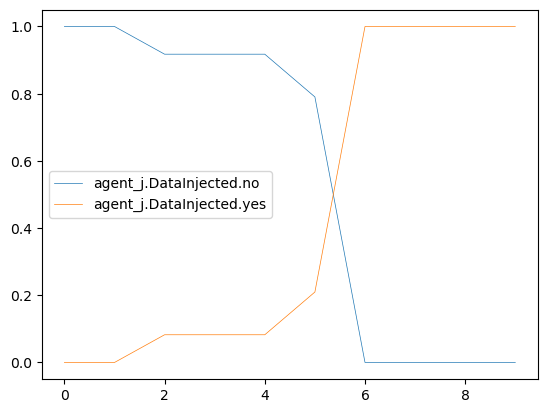

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   0.0                    1.0      DecoyAccount   
1                   0.0                    1.0  RestrictAccPrivs   
2                   0.0                    1.0               Nop   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0           LogIOCs   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

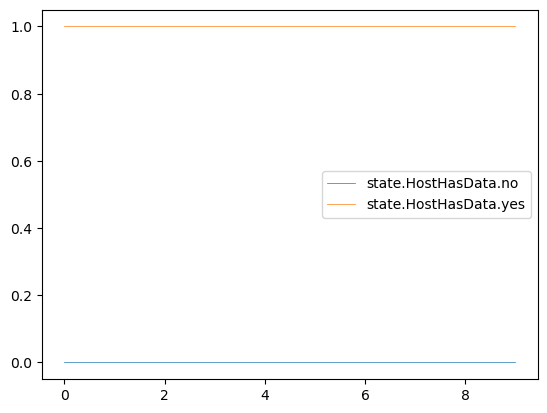

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     0.0                      1.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0           LogIOCs   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                   login_activity  
1  ManipulateData                   login_activity  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                             none  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

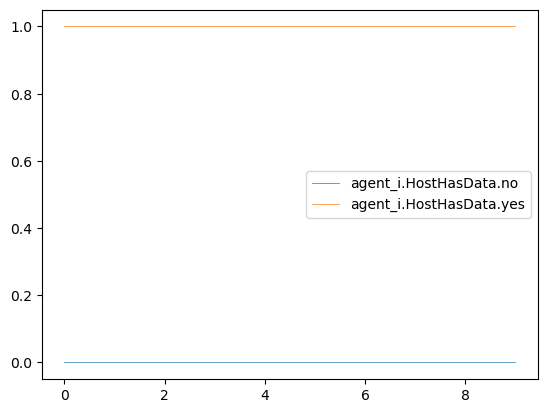

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.113637                 0.886363  ManipulateData   
2                0.573439                 0.426560    EnumAccounts   
3                0.573440                 0.426561      PrivEscAcc   
4                0.573440                 0.426561       FileRecon   
5                0.080975                 0.919025  ManipulateData   
6                0.000045                 0.999955            Exit   
7                0.000045                 0.999955             Nop   
8                0.000045                 0.999955             Nop   
9                0.000045                 0.999955             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4           LogIOCs                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                         none                           success   
2                   user_files                           success   
3                         none                           failure   
4                   user_files                           success   
5                   user_files                           success   
6                   user_files                           success   
7                         none                           success   
8                   user_files                           failure   
9                   user_files                           failure   

  agent_j.observation.ConnStatus'  
0                          active  
1                          active  
2                          active  
3                          active  
4                          active  
5                          active  
6                      terminated  
7                      terminated  
8                      terminated  
9                      terminated

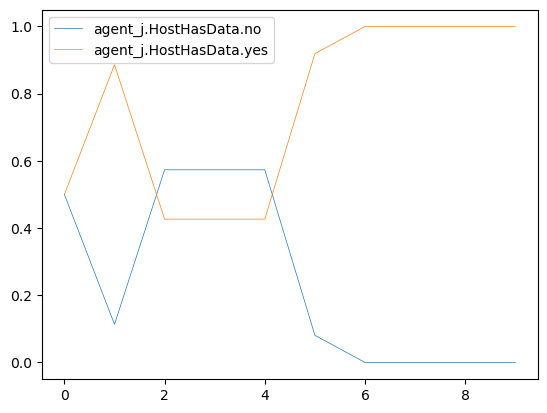

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   1.0                    0.0      DecoyAccount   
1                   0.0                    1.0  RestrictAccPrivs   
2                   0.0                    1.0               Nop   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0           LogIOCs   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

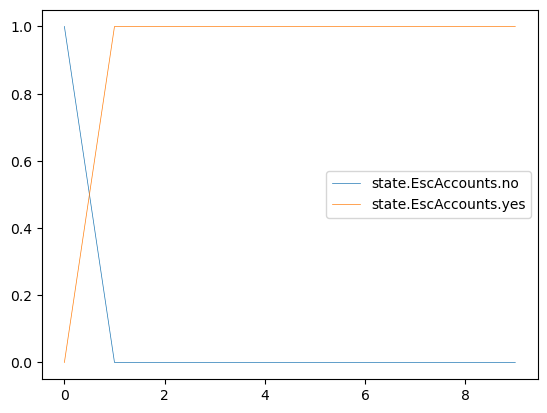

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     1.0                      0.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0           LogIOCs   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                   login_activity  
1  ManipulateData                   login_activity  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                             none  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

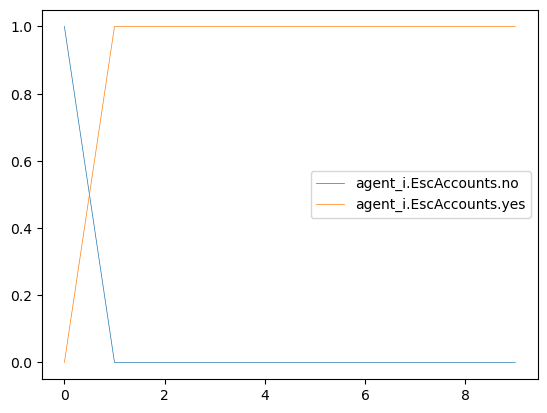

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.499995                 0.500005  ManipulateData   
2                0.499990                 0.500010    EnumAccounts   
3                0.119042                 0.880958      PrivEscAcc   
4                0.000000                 1.000000       FileRecon   
5                0.000000                 1.000000  ManipulateData   
6                0.000000                 1.000000            Exit   
7                0.000000                 1.000000             Nop   
8                0.000000                 1.000000             Nop   
9                0.000000                 1.000000             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4           LogIOCs                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                         none                           success   
2                   user_files                           success   
3                         none                           failure   
4                   user_files                           success   
5                   user_files                           success   
6                   user_files                           success   
7                         none                           success   
8                   user_files                           failure   
9                   user_files                           failure   

  agent_j.observation.ConnStatus'  
0                          active  
1                          active  
2                          active  
3                          active  
4                          active  
5                          active  
6                      terminated  
7                      terminated  
8                      terminated  
9                      terminated

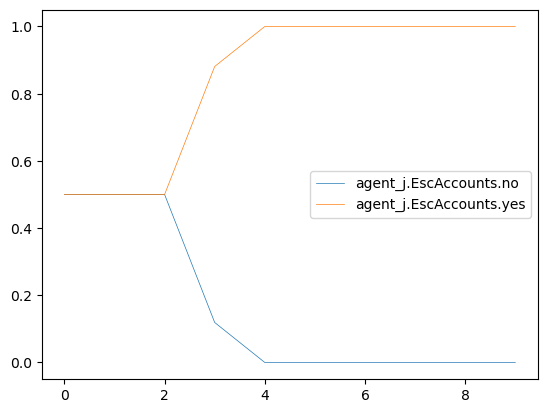

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0      DecoyAccount       FileRecon
1                 0.0                  1.0  RestrictAccPrivs  ManipulateData
2                 0.0                  1.0               Nop    EnumAccounts
3                 0.0                  1.0               Nop      PrivEscAcc
4                 0.0                  1.0           LogIOCs       FileRecon
5                 0.0                  1.0               Nop  ManipulateData
6                 0.0                  1.0               Nop            Exit
7                 0.0                  1.0               Nop             Nop
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

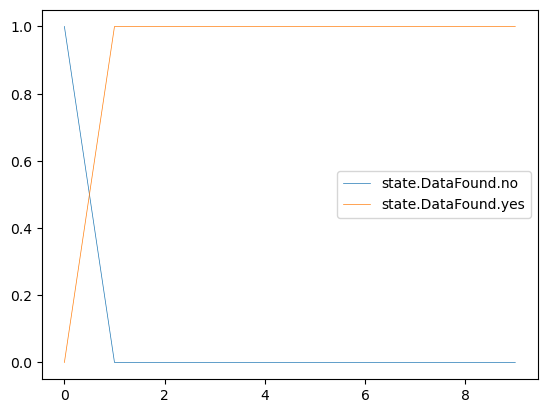

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000      DecoyAccount   
1              0.200000               0.800000  RestrictAccPrivs   
2              0.200000               0.800000               Nop   
3              0.095907               0.904093               Nop   
4              0.026591               0.973409           LogIOCs   
5              0.067322               0.932678               Nop   
6              0.014717               0.985282               Nop   
7              0.014764               0.985236               Nop   
8              0.014768               0.985232               Nop   
9              0.014768               0.985232               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                   login_activity  
1  ManipulateData                   login_activity  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                             none  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

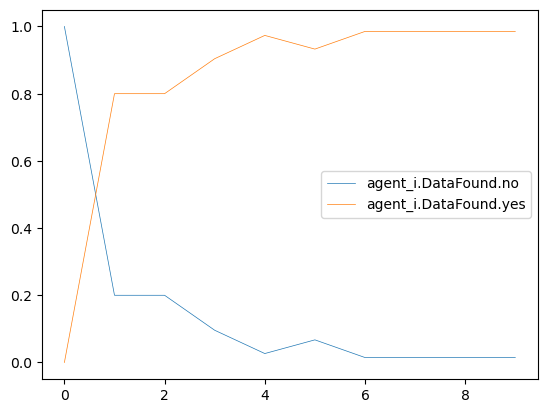

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000       FileRecon   
1              0.181820               0.818180  ManipulateData   
2              0.917503               0.082497    EnumAccounts   
3              0.917503               0.082497      PrivEscAcc   
4              0.917503               0.082497       FileRecon   
5              0.090692               0.909308  ManipulateData   
6              0.000050               0.999950            Exit   
7              0.000050               0.999950             Nop   
8              0.000050               0.999950             Nop   
9              0.000050               0.999950             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4           LogIOCs                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                         none                           success   
2                   user_files                           success   
3                         none                           failure   
4                   user_files                           success   
5                   user_files                           success   
6                   user_files                           success   
7                         none                           success   
8                   user_files                           failure   
9                   user_files                           failure   

  agent_j.observation.ConnStatus'  
0                          active  
1                          active  
2                          active  
3                          active  
4                          active  
5                          active  
6                      terminated  
7                      terminated  
8                      terminated  
9                      terminated

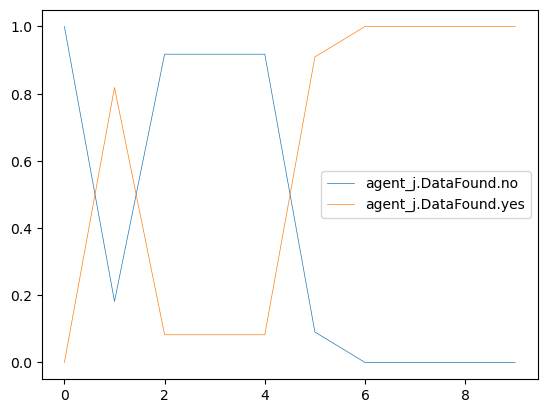

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0      DecoyAccount       FileRecon
1                 0.0                  1.0  RestrictAccPrivs  ManipulateData
2                 0.0                  1.0               Nop    EnumAccounts
3                 0.0                  1.0               Nop      PrivEscAcc
4                 0.0                  1.0           LogIOCs       FileRecon
5                 0.0                  1.0               Nop  ManipulateData
6                 0.0                  1.0               Nop            Exit
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

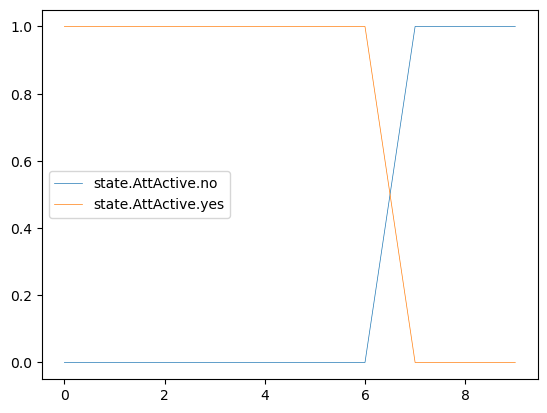

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0          0.000000e+00               1.000000      DecoyAccount   
1          0.000000e+00               1.000000  RestrictAccPrivs   
2          0.000000e+00               1.000000               Nop   
3          8.618953e-07               0.999999               Nop   
4          1.664180e-02               0.983358           LogIOCs   
5          3.238243e-01               0.676176               Nop   
6          7.648324e-02               0.923517               Nop   
7          9.977154e-01               0.002284               Nop   
8          9.999536e-01               0.000046               Nop   
9          9.999999e-01               0.000000               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                   login_activity  
1  ManipulateData                   login_activity  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                             none  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

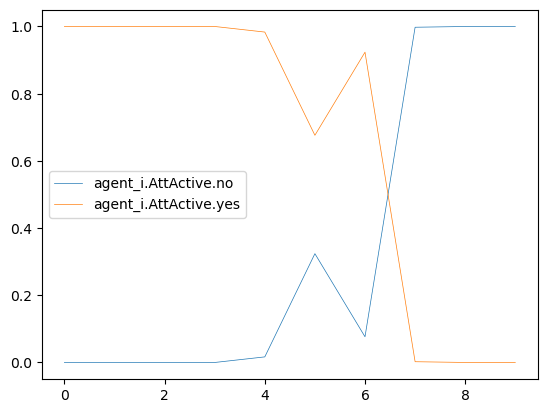

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0       FileRecon   
1                   0.0                    1.0  ManipulateData   
2                   0.0                    1.0    EnumAccounts   
3                   0.0                    1.0      PrivEscAcc   
4                   0.0                    1.0       FileRecon   
5                   0.0                    1.0  ManipulateData   
6                   0.0                    1.0            Exit   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4           LogIOCs                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                         none                           success   
2                   user_files                           success   
3                         none                           failure   
4                   user_files                           success   
5                   user_files                           success   
6                   user_files                           success   
7                         none                           success   
8                   user_files                           failure   
9                   user_files                           failure   

  agent_j.observation.ConnStatus'  
0                          active  
1                          active  
2                          active  
3                          active  
4                          active  
5                          active  
6                      terminated  
7                      terminated  
8                      terminated  
9                      terminated

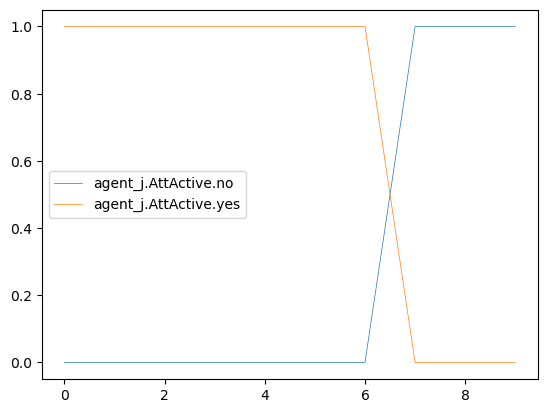

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0      DecoyAccount       FileRecon  
1                      1.0  RestrictAccPrivs  ManipulateData  
2                      1.0               Nop    EnumAccounts  
3                      1.0               Nop      PrivEscAcc  
4                      1.0           LogIOCs       FileRecon  
5                      1.0               Nop  ManipulateData  
6                      1.0               Nop            Exit  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

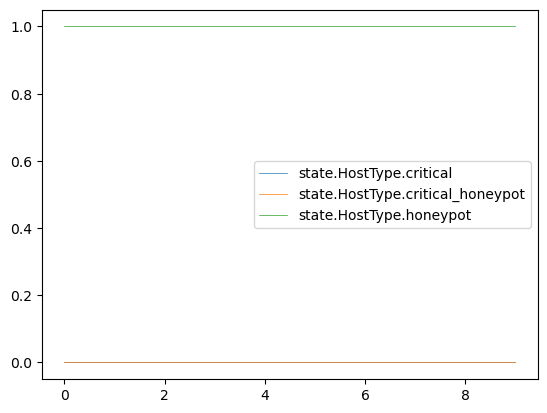

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0      DecoyAccount       FileRecon   
1                        1.0  RestrictAccPrivs  ManipulateData   
2                        1.0               Nop    EnumAccounts   
3                        1.0               Nop      PrivEscAcc   
4                        1.0           LogIOCs       FileRecon   
5                        1.0               Nop  ManipulateData   
6                        1.0               Nop            Exit   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                   login_activity  
1                   login_activity  
2                        file_enum  
3                   login_activity  
4                             none  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                             none

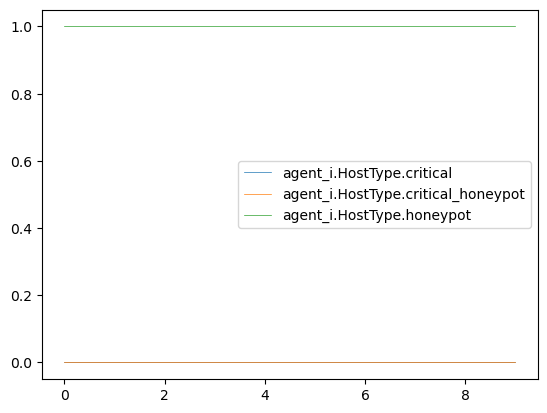

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                        0.0       FileRecon      DecoyAccount   
1                        0.0  ManipulateData  RestrictAccPrivs   
2                        0.0    EnumAccounts               Nop   
3                        0.0      PrivEscAcc               Nop   
4                        0.0       FileRecon           LogIOCs   
5                        0.0  ManipulateData               Nop   
6                        0.0            Exit               Nop   
7                        0.0             Nop               Nop   
8                        0.0             Nop               Nop   
9                        0.0             Nop               Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                   user_files   
1                          denied                         none   
2                          denied                   user_files   
3                            auth                         none   
4                            auth                   user_files   
5                            auth                   user_files   
6                            auth                   user_files   
7                          denied                         none   
8                            auth                   user_files   
9                            auth                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  
0                           success                          active  
1                           success                          active  
2                           success                          active  
3                           failure                          active  
4                           success                          active  
5                           success                          active  
6                           success                      terminated  
7                           success                      terminated  
8                           failure                      terminated  
9                           failure                      terminated

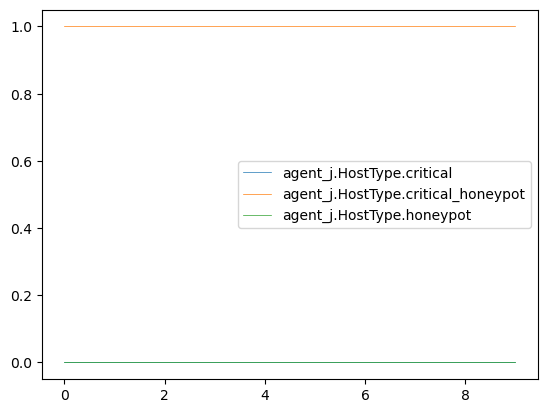

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0      DecoyAccount       FileRecon
1                1.0                 0.0  RestrictAccPrivs  ManipulateData
2                1.0                 0.0               Nop    EnumAccounts
3                0.0                 1.0               Nop      PrivEscAcc
4                0.0                 1.0           LogIOCs       FileRecon
5                0.0                 1.0               Nop  ManipulateData
6                0.0                 1.0               Nop            Exit
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

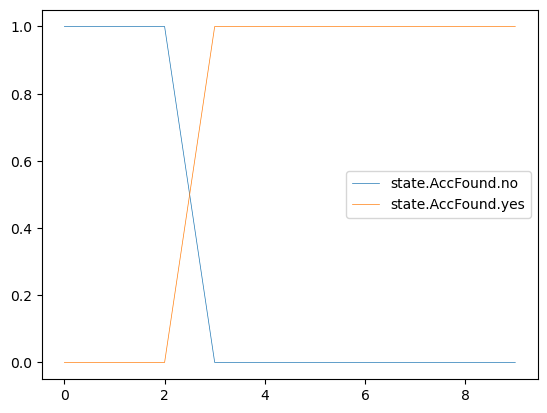

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0             1.000000              0.000000      DecoyAccount   
1             1.000000              0.000000  RestrictAccPrivs   
2             0.784000              0.216000               Nop   
3             0.235745              0.764255               Nop   
4             0.069527              0.930473           LogIOCs   
5             0.242633              0.757367               Nop   
6             0.053664              0.946336               Nop   
7             0.054399              0.945601               Nop   
8             0.054414              0.945586               Nop   
9             0.054414              0.945586               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                   login_activity  
1  ManipulateData                   login_activity  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                             none  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

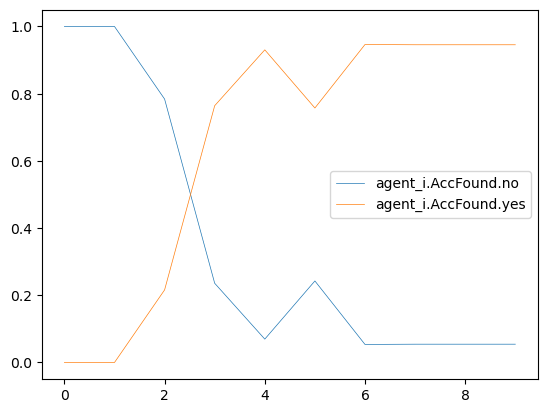

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0             1.000000              0.000000       FileRecon   
1             1.000000              0.000000  ManipulateData   
2             1.000000              0.000000    EnumAccounts   
3             0.142853              0.857147      PrivEscAcc   
4             0.000000              1.000000       FileRecon   
5             0.000000              1.000000  ManipulateData   
6             0.000000              1.000000            Exit   
7             0.000000              1.000000             Nop   
8             0.000000              1.000000             Nop   
9             0.000000              1.000000             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4           LogIOCs                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                         none                           success   
2                   user_files                           success   
3                         none                           failure   
4                   user_files                           success   
5                   user_files                           success   
6                   user_files                           success   
7                         none                           success   
8                   user_files                           failure   
9                   user_files                           failure   

  agent_j.observation.ConnStatus'  
0                          active  
1                          active  
2                          active  
3                          active  
4                          active  
5                          active  
6                      terminated  
7                      terminated  
8                      terminated  
9                      terminated

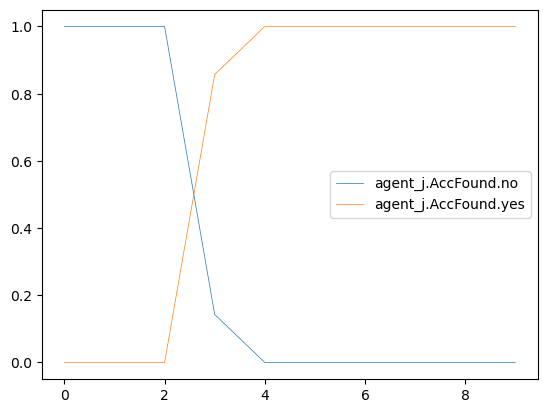

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0      DecoyAccount   
1                     0.0                     1.0  RestrictAccPrivs   
2                     0.0                     1.0               Nop   
3                     0.0                     1.0               Nop   
4                     1.0                     0.0           LogIOCs   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

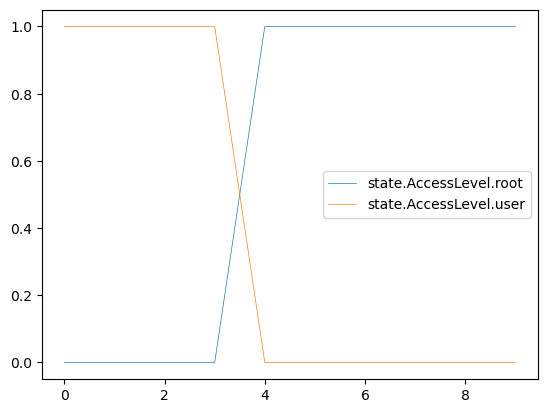

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000      DecoyAccount   
1                  0.000000                  1.000000  RestrictAccPrivs   
2                  0.000000                  1.000000               Nop   
3                  0.033510                  0.966489               Nop   
4                  0.910816                  0.089184           LogIOCs   
5                  0.658007                  0.341993               Nop   
6                  0.924367                  0.075633               Nop   
7                  0.923330                  0.076669               Nop   
8                  0.923309                  0.076691               Nop   
9                  0.923309                  0.076691               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                   login_activity  
1  ManipulateData                   login_activity  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                             none  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

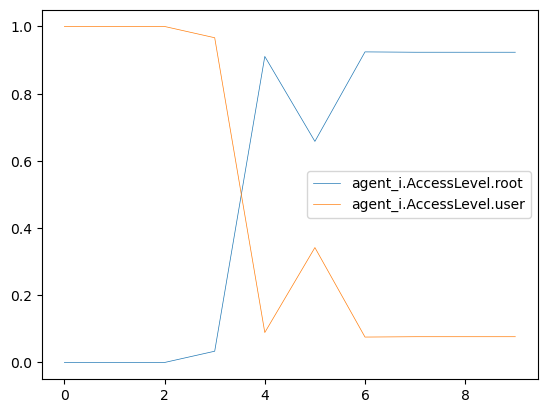

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                       0.0                       1.0       FileRecon   
1                       0.0                       1.0  ManipulateData   
2                       0.0                       1.0    EnumAccounts   
3                       0.0                       1.0      PrivEscAcc   
4                       1.0                       0.0       FileRecon   
5                       1.0                       0.0  ManipulateData   
6                       1.0                       0.0            Exit   
7                       1.0                       0.0             Nop   
8                       1.0                       0.0             Nop   
9                       1.0                       0.0             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4           LogIOCs                            auth   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                         none                           success   
2                   user_files                           success   
3                         none                           failure   
4                   user_files                           success   
5                   user_files                           success   
6                   user_files                           success   
7                         none                           success   
8                   user_files                           failure   
9                   user_files                           failure   

  agent_j.observation.ConnStatus'  
0                          active  
1                          active  
2                          active  
3                          active  
4                          active  
5                          active  
6                      terminated  
7                      terminated  
8                      terminated  
9                      terminated

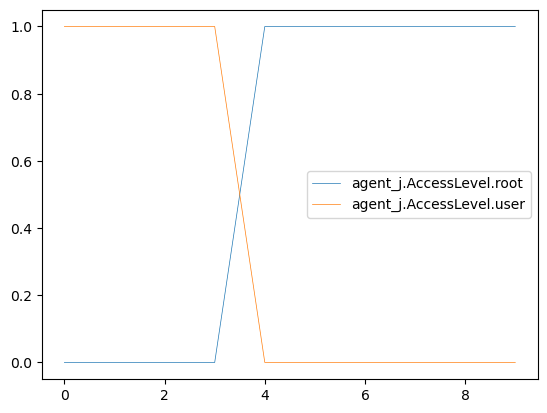

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                       file_write
2                               1.0                        file_enum
3                               1.0                   login_activity
4                               1.0                        file_enum
5                               1.0                             none
6                               1.0                        file_enum
7                               1.0                        file_enum
8                               1.0                             none
9                               1.0                       file_write

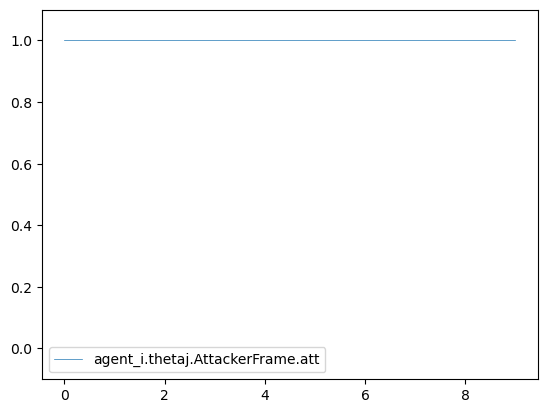

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes    agent_i.action  agent_j.action
0                  1.0                   0.0      DecoyAccount       FileRecon
1                  1.0                   0.0  RestrictAccPrivs  ManipulateData
2                  1.0                   0.0               Nop    EnumAccounts
3                  1.0                   0.0               Nop      PrivEscAcc
4                  1.0                   0.0           LogIOCs       FileRecon
5                  0.0                   1.0               Nop  ManipulateData
6                  0.0                   1.0               Nop            Exit
7                  0.0                   1.0               Nop             Nop
8                  0.0                   1.0               Nop             Nop
9                  0.0                   1.0               Nop             Nop

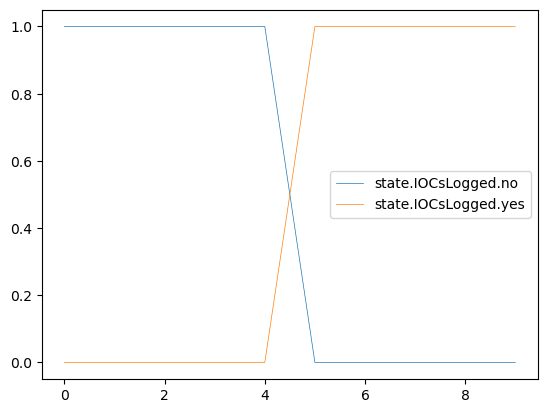

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes    agent_i.action  \
0                    1.0                     0.0      DecoyAccount   
1                    1.0                     0.0  RestrictAccPrivs   
2                    1.0                     0.0               Nop   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0           LogIOCs   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                        file_enum  
5  ManipulateData                             none  
6            Exit                        file_enum  
7             Nop                        file_enum  
8             Nop                             none  
9             Nop                       file_write

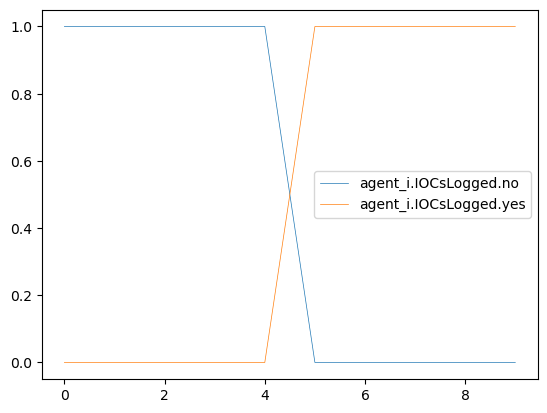

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes  agent_j.action  \
0                1.00000                 0.00000       FileRecon   
1                0.99999                 0.00001  ManipulateData   
2                0.99998                 0.00002    EnumAccounts   
3                0.99997                 0.00003      PrivEscAcc   
4                0.99996                 0.00004       FileRecon   
5                0.99995                 0.00005  ManipulateData   
6                0.99994                 0.00006            Exit   
7                0.99993                 0.00007             Nop   
8                0.99992                 0.00008             Nop   
9                0.99991                 0.00009             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4           LogIOCs                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                         none                           success   
2                   user_files                           success   
3                         none                           failure   
4                         none                           success   
5                         none                           success   
6                   user_files                           success   
7                   user_files                           failure   
8                         none                           failure   
9                         none                           success   

  agent_j.observation.ConnStatus'  
0                          active  
1                          active  
2                          active  
3                          active  
4                          active  
5                          active  
6                      terminated  
7                      terminated  
8                      terminated  
9                      terminated

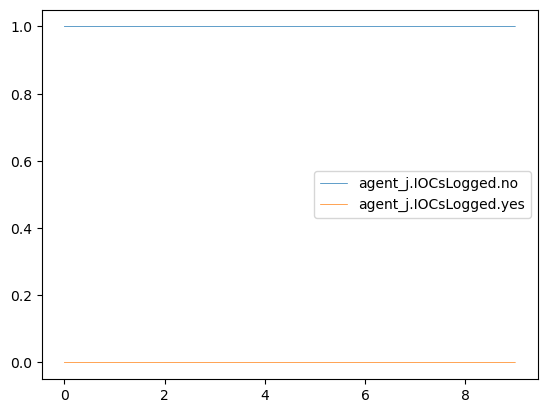

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   0.0                   1.0      DecoyAccount   
1                   0.0                   1.0  RestrictAccPrivs   
2                   1.0                   0.0               Nop   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0           LogIOCs   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

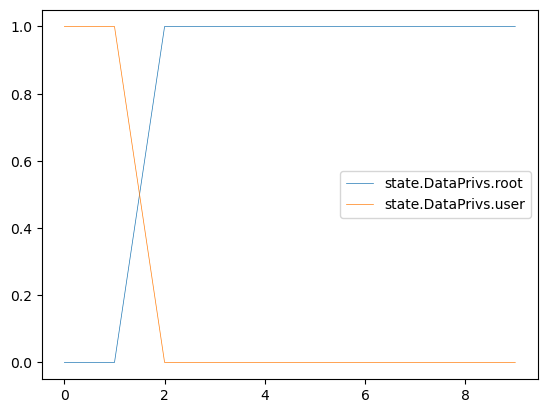

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     0.0                     1.0      DecoyAccount   
1                     0.0                     1.0  RestrictAccPrivs   
2                     1.0                     0.0               Nop   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0           LogIOCs   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                        file_enum  
5  ManipulateData                             none  
6            Exit                        file_enum  
7             Nop                        file_enum  
8             Nop                             none  
9             Nop                       file_write

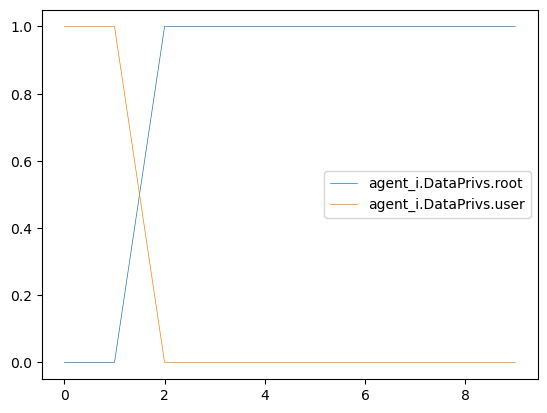

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.113638                0.886362  ManipulateData   
2                0.655943                0.344057    EnumAccounts   
3                0.655947                0.344053      PrivEscAcc   
4                0.655950                0.344050       FileRecon   
5                0.841298                0.158702  ManipulateData   
6                0.871758                0.128242            Exit   
7                0.871759                0.128241             Nop   
8                0.871760                0.128240             Nop   
9                0.871762                0.128238             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4           LogIOCs                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                         none                           success   
2                   user_files                           success   
3                         none                           failure   
4                         none                           success   
5                         none                           success   
6                   user_files                           success   
7                   user_files                           failure   
8                         none                           failure   
9                         none                           success   

  agent_j.observation.ConnStatus'  
0                          active  
1                          active  
2                          active  
3                          active  
4                          active  
5                          active  
6                      terminated  
7                      terminated  
8                      terminated  
9                      terminated

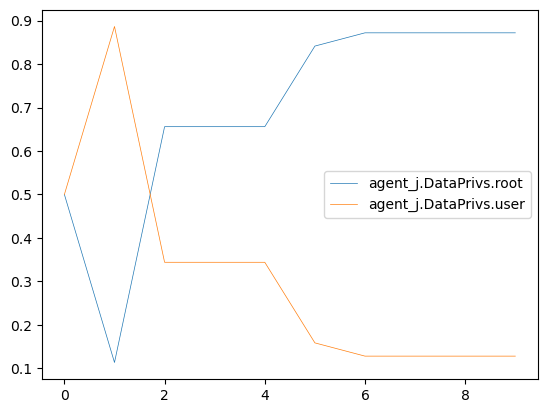

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0      DecoyAccount   
1                    1.0                     0.0  RestrictAccPrivs   
2                    0.0                     1.0               Nop   
3                    0.0                     1.0               Nop   
4                    0.0                     1.0           LogIOCs   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

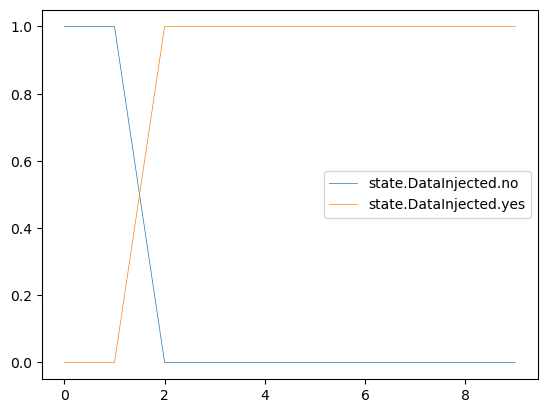

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000      DecoyAccount   
1                 1.000000                  0.000000  RestrictAccPrivs   
2                 0.063197                  0.936803               Nop   
3                 0.032391                  0.967609               Nop   
4                 0.017183                  0.982817           LogIOCs   
5                 0.014292                  0.985708               Nop   
6                 0.008048                  0.991952               Nop   
7                 0.007529                  0.992471               Nop   
8                 0.005585                  0.994415               Nop   
9                 0.005585                  0.994415               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                        file_enum  
5  ManipulateData                             none  
6            Exit                        file_enum  
7             Nop                        file_enum  
8             Nop                             none  
9             Nop                       file_write

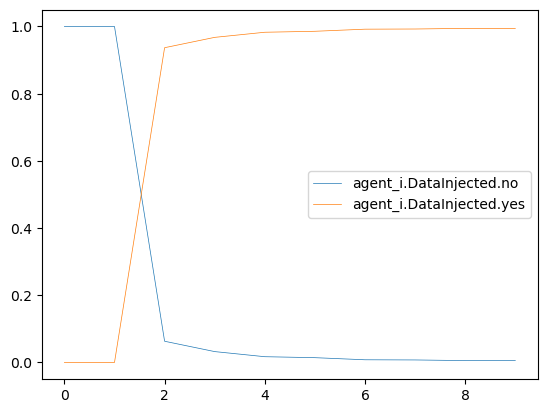

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000  ManipulateData   
2                 0.917503                  0.082497    EnumAccounts   
3                 0.917503                  0.082497      PrivEscAcc   
4                 0.917503                  0.082497       FileRecon   
5                 0.790313                  0.209687  ManipulateData   
6                 0.000050                  0.999950            Exit   
7                 0.000050                  0.999950             Nop   
8                 0.000050                  0.999950             Nop   
9                 0.000050                  0.999950             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4           LogIOCs                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                         none                           success   
2                   user_files                           success   
3                         none                           failure   
4                         none                           success   
5                         none                           success   
6                   user_files                           success   
7                   user_files                           failure   
8                         none                           failure   
9                         none                           success   

  agent_j.observation.ConnStatus'  
0                          active  
1                          active  
2                          active  
3                          active  
4                          active  
5                          active  
6                      terminated  
7                      terminated  
8                      terminated  
9                      terminated

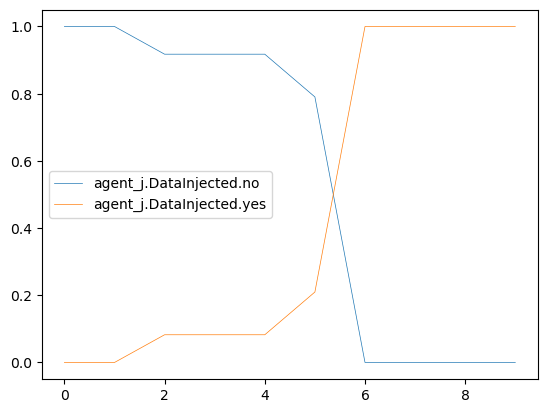

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   0.0                    1.0      DecoyAccount   
1                   0.0                    1.0  RestrictAccPrivs   
2                   0.0                    1.0               Nop   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0           LogIOCs   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

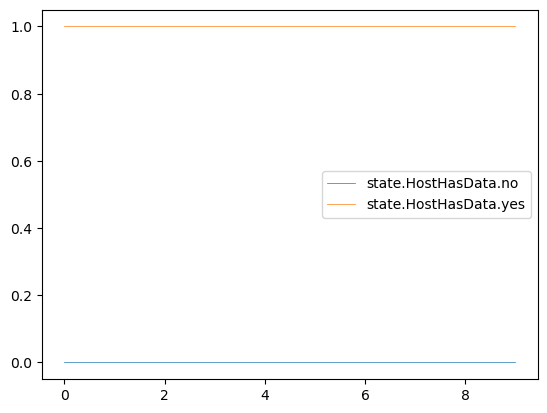

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     0.0                      1.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0           LogIOCs   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                        file_enum  
5  ManipulateData                             none  
6            Exit                        file_enum  
7             Nop                        file_enum  
8             Nop                             none  
9             Nop                       file_write

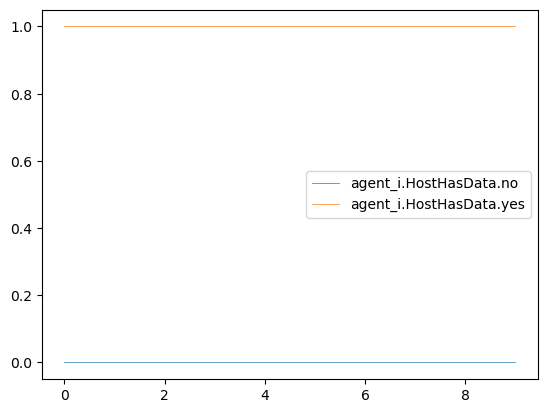

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.113637                 0.886363  ManipulateData   
2                0.573439                 0.426560    EnumAccounts   
3                0.573440                 0.426561      PrivEscAcc   
4                0.573440                 0.426561       FileRecon   
5                0.080975                 0.919025  ManipulateData   
6                0.000045                 0.999955            Exit   
7                0.000045                 0.999955             Nop   
8                0.000045                 0.999955             Nop   
9                0.000045                 0.999955             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4           LogIOCs                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                         none                           success   
2                   user_files                           success   
3                         none                           failure   
4                         none                           success   
5                         none                           success   
6                   user_files                           success   
7                   user_files                           failure   
8                         none                           failure   
9                         none                           success   

  agent_j.observation.ConnStatus'  
0                          active  
1                          active  
2                          active  
3                          active  
4                          active  
5                          active  
6                      terminated  
7                      terminated  
8                      terminated  
9                      terminated

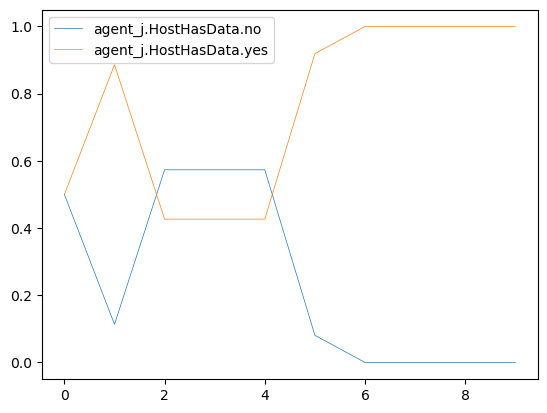

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   1.0                    0.0      DecoyAccount   
1                   0.0                    1.0  RestrictAccPrivs   
2                   0.0                    1.0               Nop   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0           LogIOCs   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

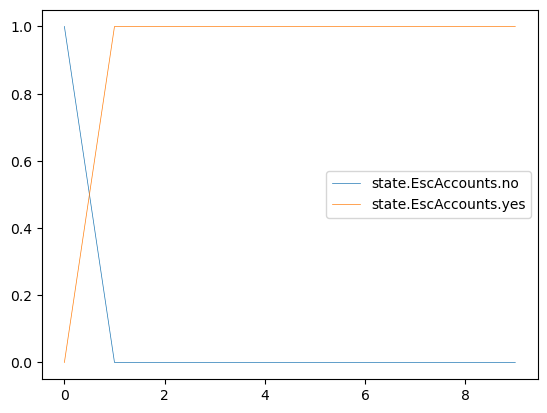

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     1.0                      0.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0           LogIOCs   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                        file_enum  
5  ManipulateData                             none  
6            Exit                        file_enum  
7             Nop                        file_enum  
8             Nop                             none  
9             Nop                       file_write

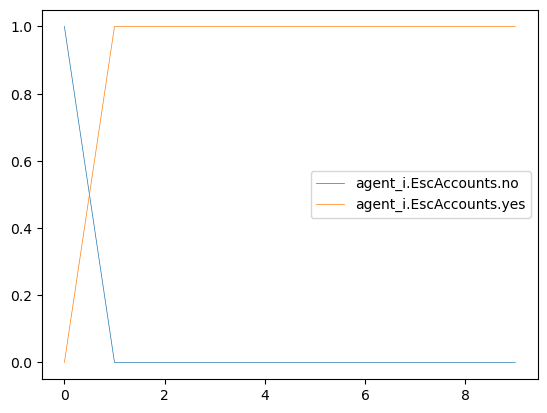

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.499995                 0.500005  ManipulateData   
2                0.499990                 0.500010    EnumAccounts   
3                0.119042                 0.880958      PrivEscAcc   
4                0.000000                 1.000000       FileRecon   
5                0.000000                 1.000000  ManipulateData   
6                0.000000                 1.000000            Exit   
7                0.000000                 1.000000             Nop   
8                0.000000                 1.000000             Nop   
9                0.000000                 1.000000             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4           LogIOCs                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                         none                           success   
2                   user_files                           success   
3                         none                           failure   
4                         none                           success   
5                         none                           success   
6                   user_files                           success   
7                   user_files                           failure   
8                         none                           failure   
9                         none                           success   

  agent_j.observation.ConnStatus'  
0                          active  
1                          active  
2                          active  
3                          active  
4                          active  
5                          active  
6                      terminated  
7                      terminated  
8                      terminated  
9                      terminated

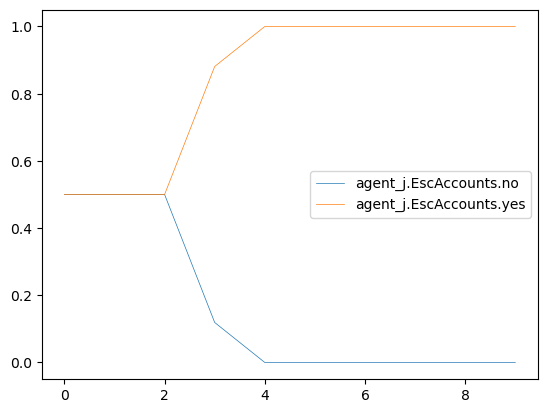

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0      DecoyAccount       FileRecon
1                 0.0                  1.0  RestrictAccPrivs  ManipulateData
2                 0.0                  1.0               Nop    EnumAccounts
3                 0.0                  1.0               Nop      PrivEscAcc
4                 0.0                  1.0           LogIOCs       FileRecon
5                 0.0                  1.0               Nop  ManipulateData
6                 0.0                  1.0               Nop            Exit
7                 0.0                  1.0               Nop             Nop
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

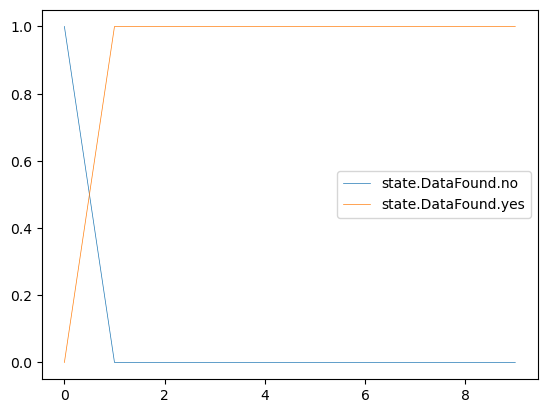

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000      DecoyAccount   
1              0.200000               0.800000  RestrictAccPrivs   
2              0.048327               0.951673               Nop   
3              0.026774               0.973226               Nop   
4              0.015574               0.984426           LogIOCs   
5              0.003404               0.996596               Nop   
6              0.004803               0.995198               Nop   
7              0.004632               0.995368               Nop   
8              0.004632               0.995368               Nop   
9              0.004632               0.995368               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                        file_enum  
5  ManipulateData                             none  
6            Exit                        file_enum  
7             Nop                        file_enum  
8             Nop                             none  
9             Nop                       file_write

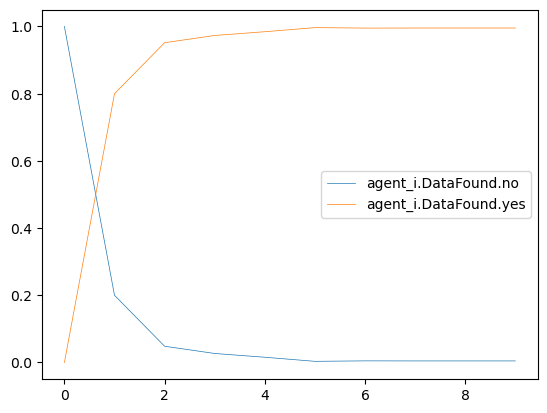

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000       FileRecon   
1              0.181820               0.818180  ManipulateData   
2              0.917503               0.082497    EnumAccounts   
3              0.917503               0.082497      PrivEscAcc   
4              0.917503               0.082497       FileRecon   
5              0.090692               0.909308  ManipulateData   
6              0.000050               0.999950            Exit   
7              0.000050               0.999950             Nop   
8              0.000050               0.999950             Nop   
9              0.000050               0.999950             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4           LogIOCs                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                         none                           success   
2                   user_files                           success   
3                         none                           failure   
4                         none                           success   
5                         none                           success   
6                   user_files                           success   
7                   user_files                           failure   
8                         none                           failure   
9                         none                           success   

  agent_j.observation.ConnStatus'  
0                          active  
1                          active  
2                          active  
3                          active  
4                          active  
5                          active  
6                      terminated  
7                      terminated  
8                      terminated  
9                      terminated

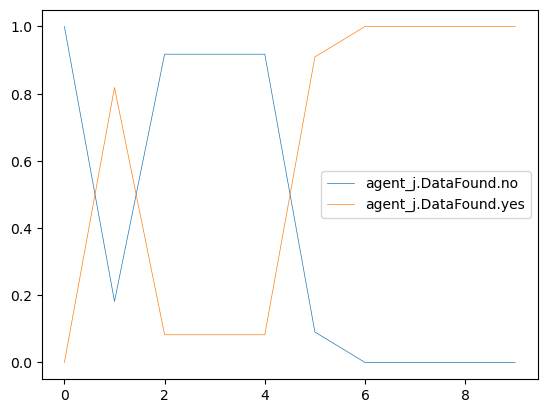

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0      DecoyAccount       FileRecon
1                 0.0                  1.0  RestrictAccPrivs  ManipulateData
2                 0.0                  1.0               Nop    EnumAccounts
3                 0.0                  1.0               Nop      PrivEscAcc
4                 0.0                  1.0           LogIOCs       FileRecon
5                 0.0                  1.0               Nop  ManipulateData
6                 0.0                  1.0               Nop            Exit
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

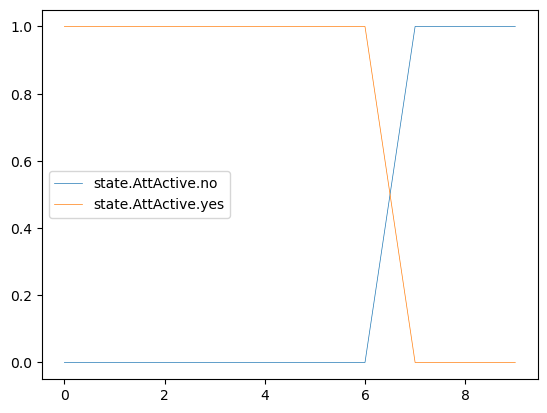

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0          0.000000e+00               1.000000      DecoyAccount   
1          0.000000e+00               1.000000  RestrictAccPrivs   
2          0.000000e+00               1.000000               Nop   
3          9.599303e-07               0.999999               Nop   
4          2.428043e-03               0.997572           LogIOCs   
5          7.489270e-03               0.992511               Nop   
6          1.997577e-01               0.800242               Nop   
7          8.707974e-01               0.129203               Nop   
8          9.465771e-01               0.053423               Nop   
9          1.000000e+00               0.000000               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                        file_enum  
5  ManipulateData                             none  
6            Exit                        file_enum  
7             Nop                        file_enum  
8             Nop                             none  
9             Nop                       file_write

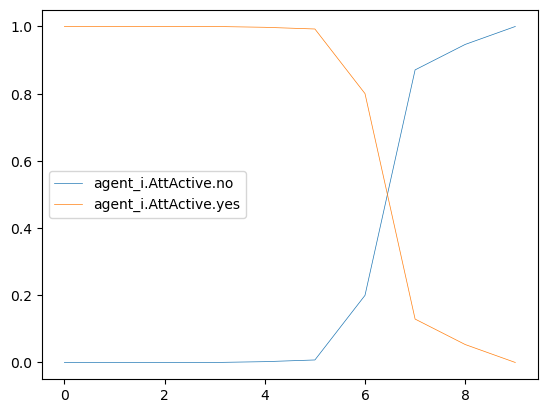

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0       FileRecon   
1                   0.0                    1.0  ManipulateData   
2                   0.0                    1.0    EnumAccounts   
3                   0.0                    1.0      PrivEscAcc   
4                   0.0                    1.0       FileRecon   
5                   0.0                    1.0  ManipulateData   
6                   0.0                    1.0            Exit   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4           LogIOCs                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                         none                           success   
2                   user_files                           success   
3                         none                           failure   
4                         none                           success   
5                         none                           success   
6                   user_files                           success   
7                   user_files                           failure   
8                         none                           failure   
9                         none                           success   

  agent_j.observation.ConnStatus'  
0                          active  
1                          active  
2                          active  
3                          active  
4                          active  
5                          active  
6                      terminated  
7                      terminated  
8                      terminated  
9                      terminated

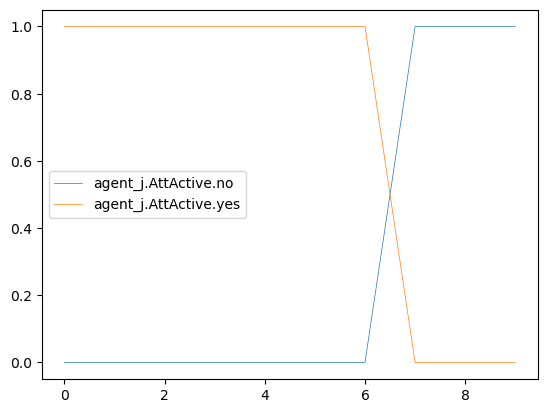

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0      DecoyAccount       FileRecon  
1                      1.0  RestrictAccPrivs  ManipulateData  
2                      1.0               Nop    EnumAccounts  
3                      1.0               Nop      PrivEscAcc  
4                      1.0           LogIOCs       FileRecon  
5                      1.0               Nop  ManipulateData  
6                      1.0               Nop            Exit  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

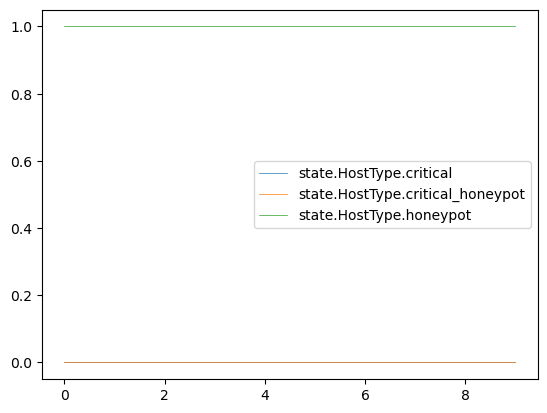

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0      DecoyAccount       FileRecon   
1                        1.0  RestrictAccPrivs  ManipulateData   
2                        1.0               Nop    EnumAccounts   
3                        1.0               Nop      PrivEscAcc   
4                        1.0           LogIOCs       FileRecon   
5                        1.0               Nop  ManipulateData   
6                        1.0               Nop            Exit   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                        file_enum  
3                   login_activity  
4                        file_enum  
5                             none  
6                        file_enum  
7                        file_enum  
8                             none  
9                       file_write

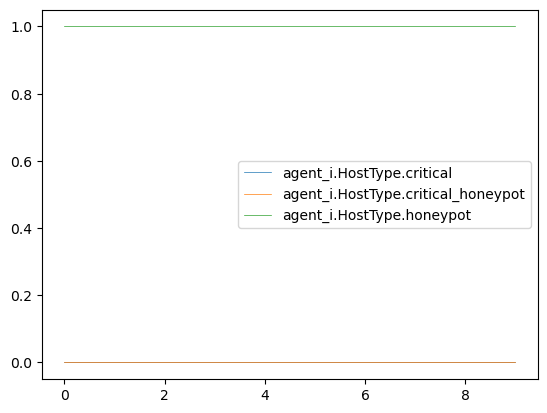

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                        0.0       FileRecon      DecoyAccount   
1                        0.0  ManipulateData  RestrictAccPrivs   
2                        0.0    EnumAccounts               Nop   
3                        0.0      PrivEscAcc               Nop   
4                        0.0       FileRecon           LogIOCs   
5                        0.0  ManipulateData               Nop   
6                        0.0            Exit               Nop   
7                        0.0             Nop               Nop   
8                        0.0             Nop               Nop   
9                        0.0             Nop               Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                   user_files   
1                          denied                         none   
2                          denied                   user_files   
3                            auth                         none   
4                            auth                         none   
5                            auth                         none   
6                          denied                   user_files   
7                            auth                   user_files   
8                            auth                         none   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  
0                           success                          active  
1                           success                          active  
2                           success                          active  
3                           failure                          active  
4                           success                          active  
5                           success                          active  
6                           success                      terminated  
7                           failure                      terminated  
8                           failure                      terminated  
9                           success                      terminated

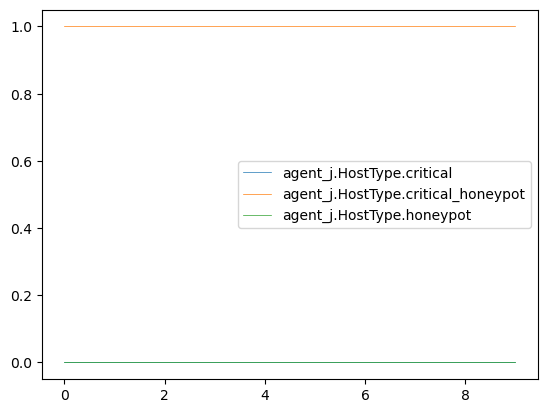

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0      DecoyAccount       FileRecon
1                1.0                 0.0  RestrictAccPrivs  ManipulateData
2                1.0                 0.0               Nop    EnumAccounts
3                0.0                 1.0               Nop      PrivEscAcc
4                0.0                 1.0           LogIOCs       FileRecon
5                0.0                 1.0               Nop  ManipulateData
6                0.0                 1.0               Nop            Exit
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

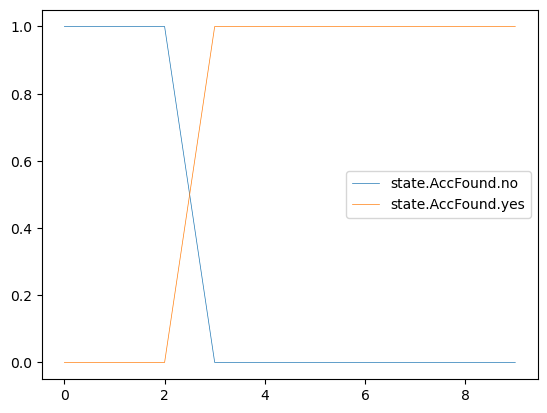

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0             1.000000              0.000000      DecoyAccount   
1             1.000000              0.000000  RestrictAccPrivs   
2             0.959851              0.040149               Nop   
3             0.205688              0.794312               Nop   
4             0.060385              0.939615           LogIOCs   
5             0.032005              0.967995               Nop   
6             0.185583              0.814417               Nop   
7             0.176101              0.823899               Nop   
8             0.176101              0.823899               Nop   
9             0.176101              0.823899               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                        file_enum  
5  ManipulateData                             none  
6            Exit                        file_enum  
7             Nop                        file_enum  
8             Nop                             none  
9             Nop                       file_write

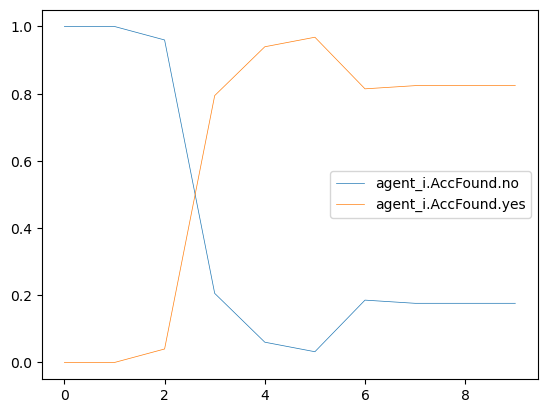

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0             1.000000              0.000000       FileRecon   
1             1.000000              0.000000  ManipulateData   
2             1.000000              0.000000    EnumAccounts   
3             0.142853              0.857147      PrivEscAcc   
4             0.000000              1.000000       FileRecon   
5             0.000000              1.000000  ManipulateData   
6             0.000000              1.000000            Exit   
7             0.000000              1.000000             Nop   
8             0.000000              1.000000             Nop   
9             0.000000              1.000000             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4           LogIOCs                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                         none                           success   
2                   user_files                           success   
3                         none                           failure   
4                         none                           success   
5                         none                           success   
6                   user_files                           success   
7                   user_files                           failure   
8                         none                           failure   
9                         none                           success   

  agent_j.observation.ConnStatus'  
0                          active  
1                          active  
2                          active  
3                          active  
4                          active  
5                          active  
6                      terminated  
7                      terminated  
8                      terminated  
9                      terminated

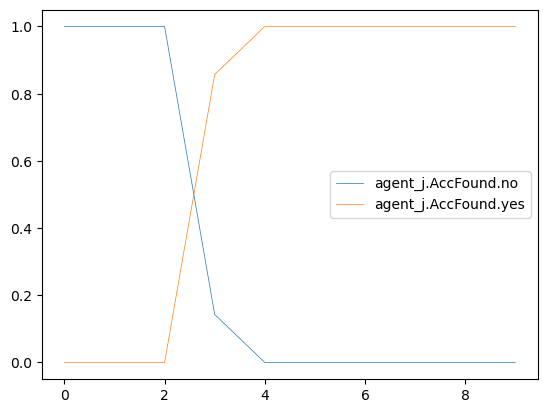

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0      DecoyAccount   
1                     0.0                     1.0  RestrictAccPrivs   
2                     0.0                     1.0               Nop   
3                     0.0                     1.0               Nop   
4                     1.0                     0.0           LogIOCs   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

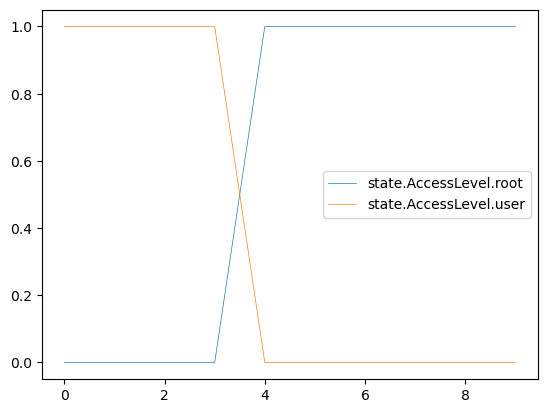

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000      DecoyAccount   
1                  0.000000                  1.000000  RestrictAccPrivs   
2                  0.000000                  1.000000               Nop   
3                  0.005332                  0.994668               Nop   
4                  0.924187                  0.075813           LogIOCs   
5                  0.965691                  0.034309               Nop   
6                  0.801047                  0.198953               Nop   
7                  0.811212                  0.188788               Nop   
8                  0.811212                  0.188788               Nop   
9                  0.811212                  0.188788               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                        file_enum  
5  ManipulateData                             none  
6            Exit                        file_enum  
7             Nop                        file_enum  
8             Nop                             none  
9             Nop                       file_write

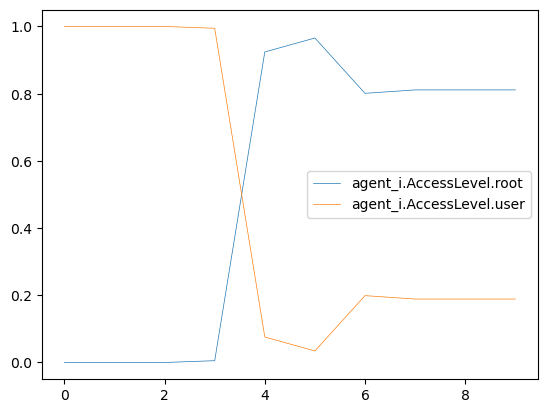

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                       0.0                       1.0       FileRecon   
1                       0.0                       1.0  ManipulateData   
2                       0.0                       1.0    EnumAccounts   
3                       0.0                       1.0      PrivEscAcc   
4                       1.0                       0.0       FileRecon   
5                       1.0                       0.0  ManipulateData   
6                       1.0                       0.0            Exit   
7                       1.0                       0.0             Nop   
8                       1.0                       0.0             Nop   
9                       1.0                       0.0             Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4           LogIOCs                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           success   
1                         none                           success   
2                   user_files                           success   
3                         none                           failure   
4                         none                           success   
5                         none                           success   
6                   user_files                           success   
7                   user_files                           failure   
8                         none                           failure   
9                         none                           success   

  agent_j.observation.ConnStatus'  
0                          active  
1                          active  
2                          active  
3                          active  
4                          active  
5                          active  
6                      terminated  
7                      terminated  
8                      terminated  
9                      terminated

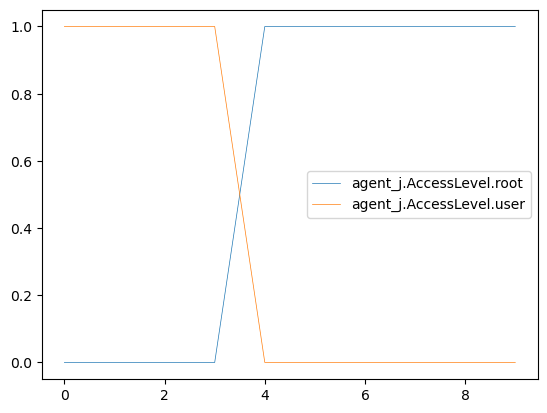

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                       file_write
1                               1.0                   login_activity
2                               1.0                       file_write
3                               1.0                             none
4                               1.0                             none
5                               1.0                       file_write
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

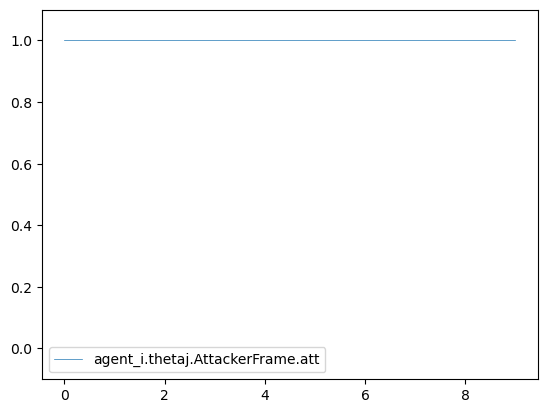

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes    agent_i.action agent_j.action
0                  1.0                   0.0      DecoyAccount      FileRecon
1                  1.0                   0.0  RestrictAccPrivs   EnumAccounts
2                  1.0                   0.0               Nop      FileRecon
3                  1.0                   0.0               Nop           Exit
4                  1.0                   0.0               Nop            Nop
5                  1.0                   0.0               Nop            Nop
6                  1.0                   0.0           LogIOCs            Nop
7                  0.0                   1.0               Nop            Nop
8                  0.0                   1.0               Nop            Nop
9                  0.0                   1.0               Nop            Nop

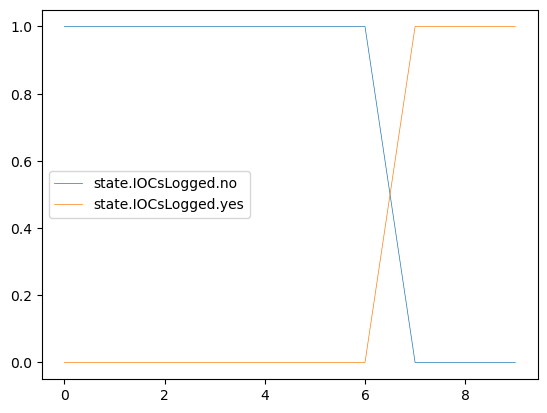

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes    agent_i.action  \
0                    1.0                     0.0      DecoyAccount   
1                    1.0                     0.0  RestrictAccPrivs   
2                    1.0                     0.0               Nop   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    1.0                     0.0               Nop   
6                    1.0                     0.0           LogIOCs   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                       file_write  
1   EnumAccounts                   login_activity  
2      FileRecon                       file_write  
3           Exit                             none  
4            Nop                             none  
5            Nop                       file_write  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

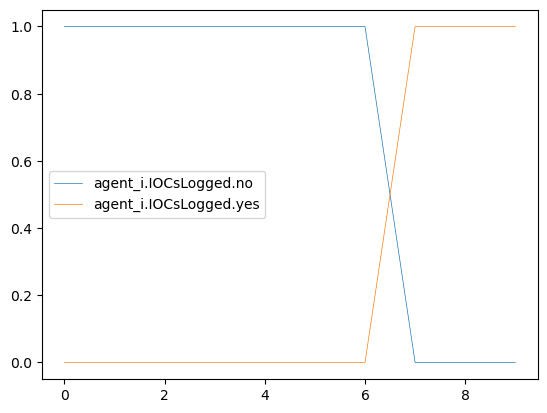

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes agent_j.action  \
0                1.00000                 0.00000      FileRecon   
1                0.99999                 0.00001   EnumAccounts   
2                0.99998                 0.00002      FileRecon   
3                0.99997                 0.00003           Exit   
4                0.99996                 0.00004            Nop   
5                0.99995                 0.00005            Nop   
6                0.99994                 0.00006            Nop   
7                0.99993                 0.00007            Nop   
8                0.99992                 0.00008            Nop   
9                0.99991                 0.00009            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6           LogIOCs                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                   user_files                           success   
4                   user_files                           failure   
5                   user_files                           failure   
6                   user_files                           failure   
7                         none                           success   
8                   user_files                           success   
9                         none                           failure   

  agent_j.observation.ConnStatus'  
0                          active  
1                          active  
2                          active  
3                      terminated  
4                      terminated  
5                      terminated  
6                      terminated  
7                      terminated  
8                      terminated  
9                      terminated

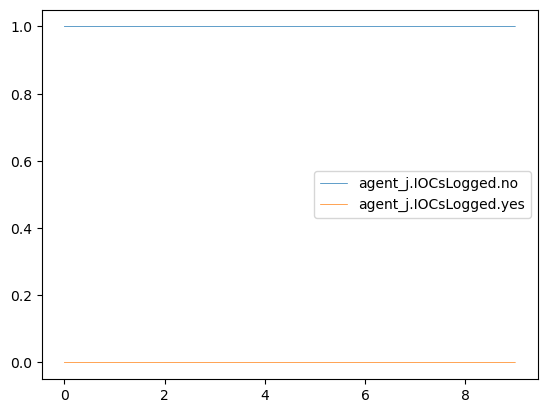

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action agent_j.action
0                   0.0                   1.0      DecoyAccount      FileRecon
1                   0.0                   1.0  RestrictAccPrivs   EnumAccounts
2                   1.0                   0.0               Nop      FileRecon
3                   1.0                   0.0               Nop           Exit
4                   1.0                   0.0               Nop            Nop
5                   1.0                   0.0               Nop            Nop
6                   1.0                   0.0           LogIOCs            Nop
7                   1.0                   0.0               Nop            Nop
8                   1.0                   0.0               Nop            Nop
9                   1.0                   0.0               Nop            Nop

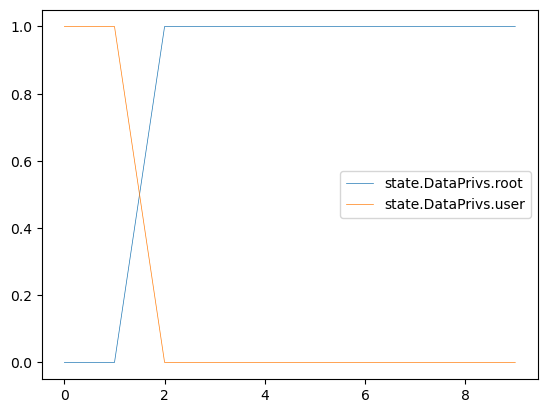

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     0.0                     1.0      DecoyAccount   
1                     0.0                     1.0  RestrictAccPrivs   
2                     1.0                     0.0               Nop   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0           LogIOCs   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                       file_write  
1   EnumAccounts                   login_activity  
2      FileRecon                       file_write  
3           Exit                             none  
4            Nop                             none  
5            Nop                       file_write  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

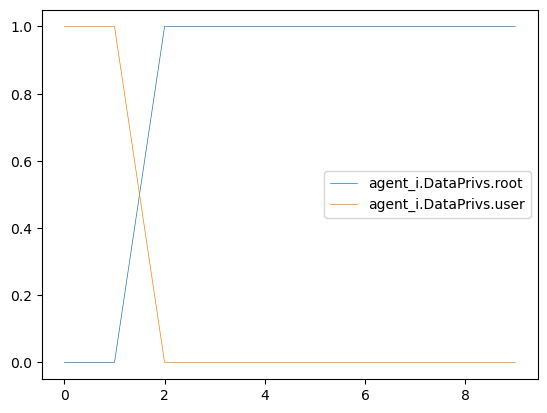

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000      FileRecon   
1                0.592109                0.407891   EnumAccounts   
2                0.592113                0.407887      FileRecon   
3                0.642053                0.357947           Exit   
4                0.642056                0.357944            Nop   
5                0.642060                0.357940            Nop   
6                0.642063                0.357936            Nop   
7                0.642067                0.357933            Nop   
8                0.642071                0.357929            Nop   
9                0.642074                0.357926            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6           LogIOCs                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                   user_files                           success   
4                   user_files                           failure   
5                   user_files                           failure   
6                   user_files                           failure   
7                         none                           success   
8                   user_files                           success   
9                         none                           failure   

  agent_j.observation.ConnStatus'  
0                          active  
1                          active  
2                          active  
3                      terminated  
4                      terminated  
5                      terminated  
6                      terminated  
7                      terminated  
8                      terminated  
9                      terminated

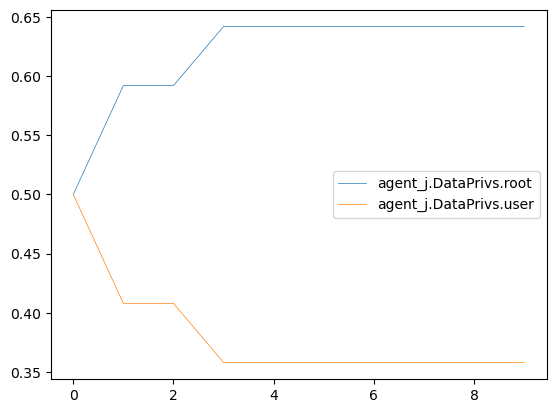

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0      DecoyAccount   
1                    1.0                     0.0  RestrictAccPrivs   
2                    1.0                     0.0               Nop   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    1.0                     0.0               Nop   
6                    1.0                     0.0           LogIOCs   
7                    1.0                     0.0               Nop   
8                    1.0                     0.0               Nop   
9                    1.0                     0.0               Nop   

  agent_j.action  
0      FileRecon  
1   EnumAccounts  
2      FileRecon  
3           Exit  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

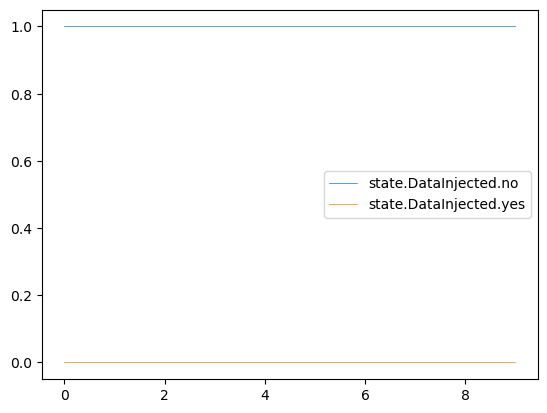

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000      DecoyAccount   
1                 1.000000                  0.000000  RestrictAccPrivs   
2                 0.280000                  0.720000               Nop   
3                 0.280000                  0.720000               Nop   
4                 0.488058                  0.511942               Nop   
5                 0.633229                  0.366771               Nop   
6                 0.401985                  0.598015           LogIOCs   
7                 0.403763                  0.596237               Nop   
8                 0.403802                  0.596198               Nop   
9                 0.403802                  0.596198               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                       file_write  
1   EnumAccounts                   login_activity  
2      FileRecon                       file_write  
3           Exit                             none  
4            Nop                             none  
5            Nop                       file_write  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

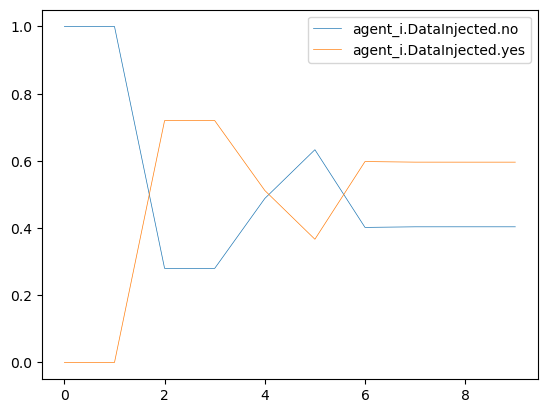

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0   EnumAccounts   
2                      1.0                       0.0      FileRecon   
3                      1.0                       0.0           Exit   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6           LogIOCs                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                   user_files                           success   
4                   user_files                           failure   
5                   user_files                           failure   
6                   user_files                           failure   
7                         none                           success   
8                   user_files                           success   
9                         none                           failure   

  agent_j.observation.ConnStatus'  
0                          active  
1                          active  
2                          active  
3                      terminated  
4                      terminated  
5                      terminated  
6                      terminated  
7                      terminated  
8                      terminated  
9                      terminated

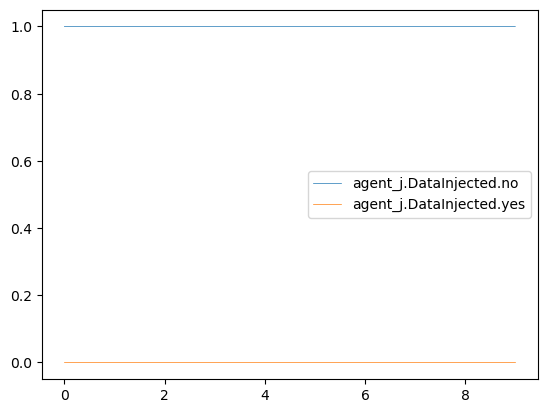

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   0.0                    1.0      DecoyAccount   
1                   0.0                    1.0  RestrictAccPrivs   
2                   0.0                    1.0               Nop   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0           LogIOCs   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

  agent_j.action  
0      FileRecon  
1   EnumAccounts  
2      FileRecon  
3           Exit  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

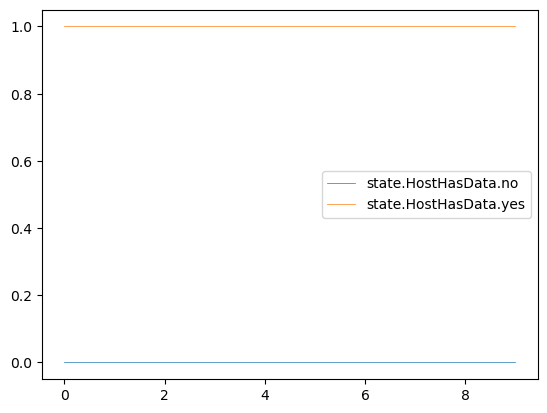

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     0.0                      1.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0           LogIOCs   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                       file_write  
1   EnumAccounts                   login_activity  
2      FileRecon                       file_write  
3           Exit                             none  
4            Nop                             none  
5            Nop                       file_write  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

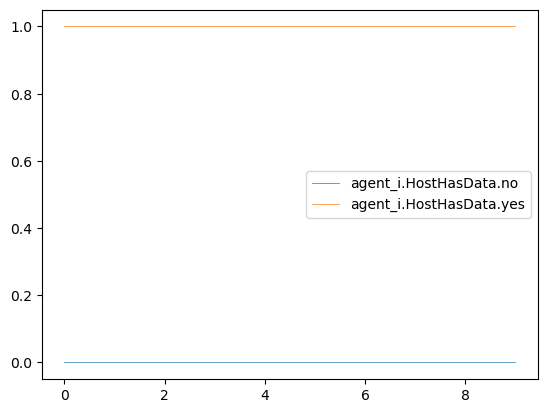

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.592106                 0.407894   EnumAccounts   
2                0.592106                 0.407894      FileRecon   
3                0.642042                 0.357958           Exit   
4                0.642042                 0.357958            Nop   
5                0.642042                 0.357958            Nop   
6                0.642042                 0.357958            Nop   
7                0.642042                 0.357958            Nop   
8                0.642042                 0.357958            Nop   
9                0.642042                 0.357958            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6           LogIOCs                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                   user_files                           success   
4                   user_files                           failure   
5                   user_files                           failure   
6                   user_files                           failure   
7                         none                           success   
8                   user_files                           success   
9                         none                           failure   

  agent_j.observation.ConnStatus'  
0                          active  
1                          active  
2                          active  
3                      terminated  
4                      terminated  
5                      terminated  
6                      terminated  
7                      terminated  
8                      terminated  
9                      terminated

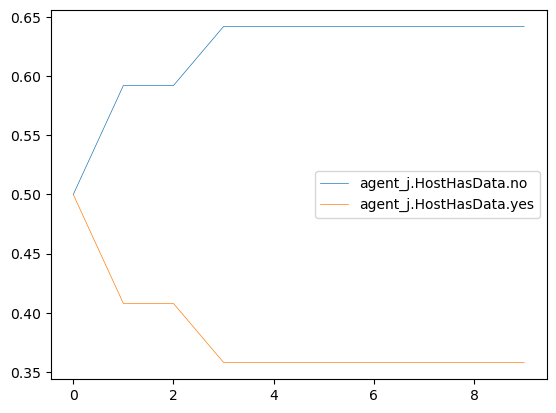

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   1.0                    0.0      DecoyAccount   
1                   0.0                    1.0  RestrictAccPrivs   
2                   0.0                    1.0               Nop   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0           LogIOCs   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

  agent_j.action  
0      FileRecon  
1   EnumAccounts  
2      FileRecon  
3           Exit  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

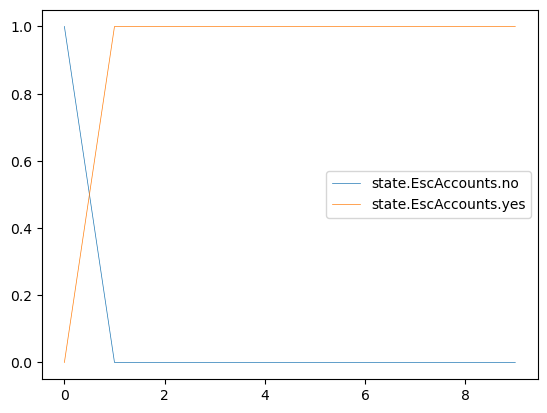

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     1.0                      0.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0           LogIOCs   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                       file_write  
1   EnumAccounts                   login_activity  
2      FileRecon                       file_write  
3           Exit                             none  
4            Nop                             none  
5            Nop                       file_write  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

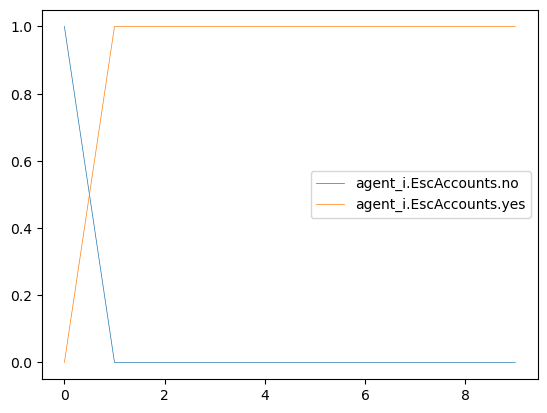

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.499995                 0.500005   EnumAccounts   
2                0.775851                 0.224149      FileRecon   
3                0.775843                 0.224157           Exit   
4                0.775835                 0.224165            Nop   
5                0.775828                 0.224172            Nop   
6                0.775820                 0.224180            Nop   
7                0.775812                 0.224188            Nop   
8                0.775804                 0.224196            Nop   
9                0.775797                 0.224203            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6           LogIOCs                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                   user_files                           success   
4                   user_files                           failure   
5                   user_files                           failure   
6                   user_files                           failure   
7                         none                           success   
8                   user_files                           success   
9                         none                           failure   

  agent_j.observation.ConnStatus'  
0                          active  
1                          active  
2                          active  
3                      terminated  
4                      terminated  
5                      terminated  
6                      terminated  
7                      terminated  
8                      terminated  
9                      terminated

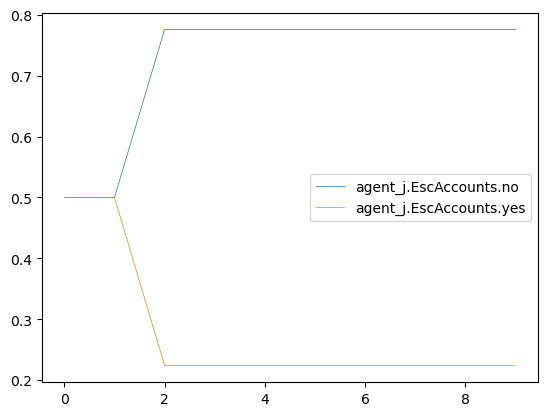

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action agent_j.action
0                 1.0                  0.0      DecoyAccount      FileRecon
1                 1.0                  0.0  RestrictAccPrivs   EnumAccounts
2                 1.0                  0.0               Nop      FileRecon
3                 1.0                  0.0               Nop           Exit
4                 1.0                  0.0               Nop            Nop
5                 1.0                  0.0               Nop            Nop
6                 1.0                  0.0           LogIOCs            Nop
7                 1.0                  0.0               Nop            Nop
8                 1.0                  0.0               Nop            Nop
9                 1.0                  0.0               Nop            Nop

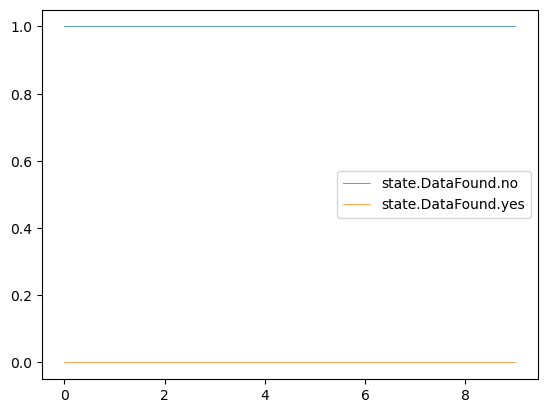

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000      DecoyAccount   
1              0.200000               0.800000  RestrictAccPrivs   
2              0.200000               0.800000               Nop   
3              0.200000               0.800000               Nop   
4              0.264624               0.735376               Nop   
5              0.435698               0.564302               Nop   
6              0.279464               0.720536           LogIOCs   
7              0.281150               0.718850               Nop   
8              0.281183               0.718817               Nop   
9              0.281183               0.718817               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                       file_write  
1   EnumAccounts                   login_activity  
2      FileRecon                       file_write  
3           Exit                             none  
4            Nop                             none  
5            Nop                       file_write  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

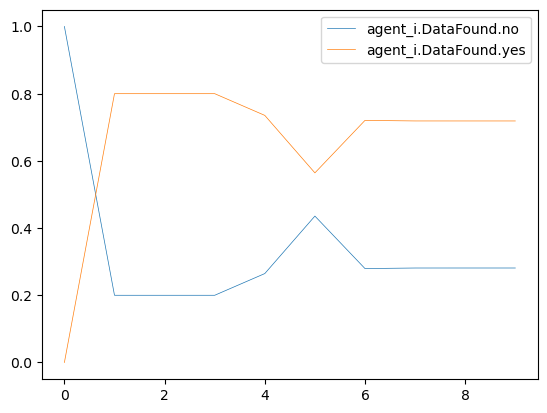

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action  \
0              1.000000               0.000000      FileRecon   
1              0.947369               0.052631   EnumAccounts   
2              0.947369               0.052631      FileRecon   
3              0.975904               0.024096           Exit   
4              0.975904               0.024096            Nop   
5              0.975904               0.024096            Nop   
6              0.975904               0.024096            Nop   
7              0.975904               0.024096            Nop   
8              0.975904               0.024096            Nop   
9              0.975904               0.024096            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6           LogIOCs                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                   user_files                           success   
4                   user_files                           failure   
5                   user_files                           failure   
6                   user_files                           failure   
7                         none                           success   
8                   user_files                           success   
9                         none                           failure   

  agent_j.observation.ConnStatus'  
0                          active  
1                          active  
2                          active  
3                      terminated  
4                      terminated  
5                      terminated  
6                      terminated  
7                      terminated  
8                      terminated  
9                      terminated

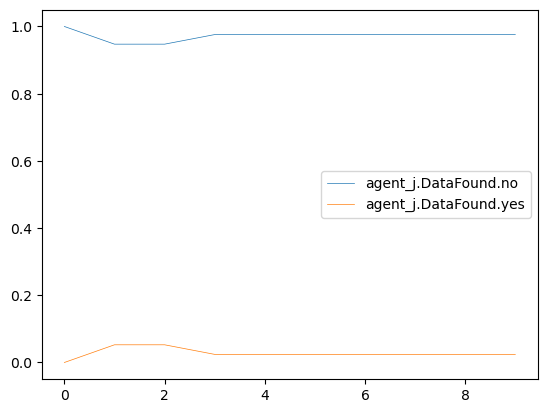

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action agent_j.action
0                 0.0                  1.0      DecoyAccount      FileRecon
1                 0.0                  1.0  RestrictAccPrivs   EnumAccounts
2                 0.0                  1.0               Nop      FileRecon
3                 0.0                  1.0               Nop           Exit
4                 1.0                  0.0               Nop            Nop
5                 1.0                  0.0               Nop            Nop
6                 1.0                  0.0           LogIOCs            Nop
7                 1.0                  0.0               Nop            Nop
8                 1.0                  0.0               Nop            Nop
9                 1.0                  0.0               Nop            Nop

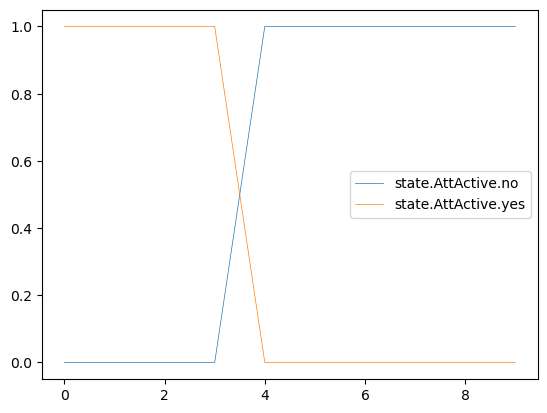

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0              0.000000               1.000000      DecoyAccount   
1              0.000000               1.000000  RestrictAccPrivs   
2              0.000000               1.000000               Nop   
3              0.000005               0.999995               Nop   
4              0.337131               0.662869               Nop   
5              0.864790               0.135210               Nop   
6              0.575002               0.424997           LogIOCs   
7              0.998953               0.001046               Nop   
8              0.999980               0.000020               Nop   
9              1.000000               0.000000               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                       file_write  
1   EnumAccounts                   login_activity  
2      FileRecon                       file_write  
3           Exit                             none  
4            Nop                             none  
5            Nop                       file_write  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

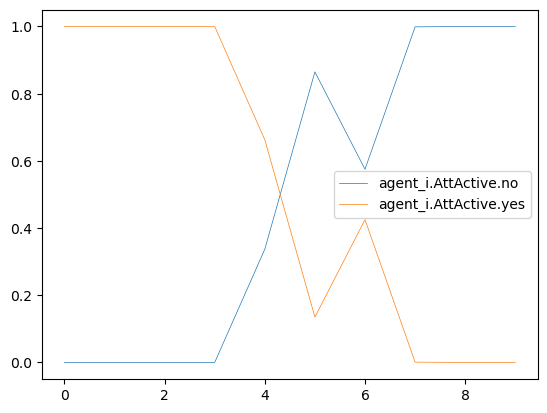

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action  \
0                   0.0                    1.0      FileRecon   
1                   0.0                    1.0   EnumAccounts   
2                   0.0                    1.0      FileRecon   
3                   0.0                    1.0           Exit   
4                   1.0                    0.0            Nop   
5                   1.0                    0.0            Nop   
6                   1.0                    0.0            Nop   
7                   1.0                    0.0            Nop   
8                   1.0                    0.0            Nop   
9                   1.0                    0.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6           LogIOCs                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                   user_files                           success   
4                   user_files                           failure   
5                   user_files                           failure   
6                   user_files                           failure   
7                         none                           success   
8                   user_files                           success   
9                         none                           failure   

  agent_j.observation.ConnStatus'  
0                          active  
1                          active  
2                          active  
3                      terminated  
4                      terminated  
5                      terminated  
6                      terminated  
7                      terminated  
8                      terminated  
9                      terminated

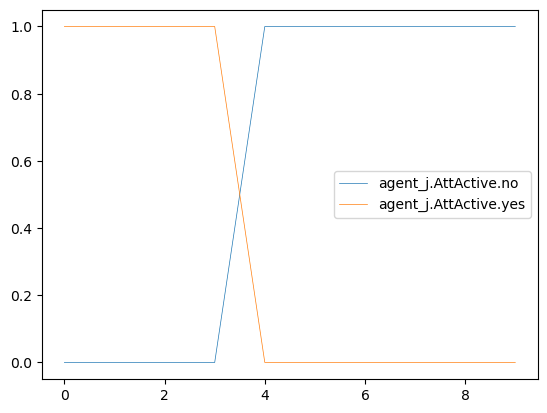

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action agent_j.action  
0                      1.0      DecoyAccount      FileRecon  
1                      1.0  RestrictAccPrivs   EnumAccounts  
2                      1.0               Nop      FileRecon  
3                      1.0               Nop           Exit  
4                      1.0               Nop            Nop  
5                      1.0               Nop            Nop  
6                      1.0           LogIOCs            Nop  
7                      1.0               Nop            Nop  
8                      1.0               Nop            Nop  
9                      1.0               Nop            Nop

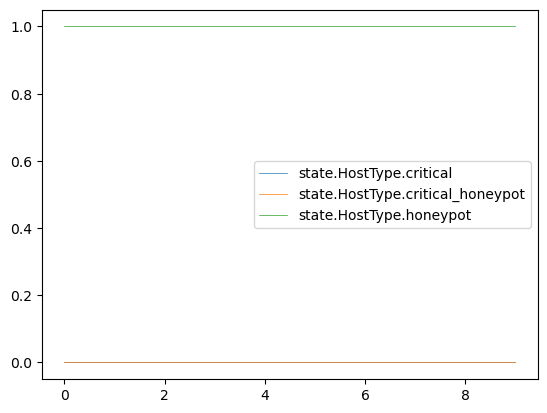

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action agent_j.action  \
0                        1.0      DecoyAccount      FileRecon   
1                        1.0  RestrictAccPrivs   EnumAccounts   
2                        1.0               Nop      FileRecon   
3                        1.0               Nop           Exit   
4                        1.0               Nop            Nop   
5                        1.0               Nop            Nop   
6                        1.0           LogIOCs            Nop   
7                        1.0               Nop            Nop   
8                        1.0               Nop            Nop   
9                        1.0               Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                       file_write  
1                   login_activity  
2                       file_write  
3                             none  
4                             none  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                             none

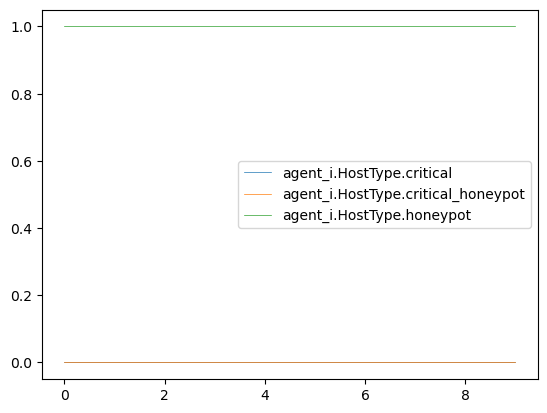

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot agent_j.action    agent_i.action  \
0                        0.0      FileRecon      DecoyAccount   
1                        0.0   EnumAccounts  RestrictAccPrivs   
2                        0.0      FileRecon               Nop   
3                        0.0           Exit               Nop   
4                        0.0            Nop               Nop   
5                        0.0            Nop               Nop   
6                        0.0            Nop           LogIOCs   
7                        0.0            Nop               Nop   
8                        0.0            Nop               Nop   
9                        0.0            Nop               Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                   user_files   
1                          denied                   user_files   
2                            auth                         none   
3                            auth                   user_files   
4                            auth                   user_files   
5                          denied                   user_files   
6                            auth                   user_files   
7                            auth                         none   
8                            auth                   user_files   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  
0                           failure                          active  
1                           failure                          active  
2                           failure                          active  
3                           success                      terminated  
4                           failure                      terminated  
5                           failure                      terminated  
6                           failure                      terminated  
7                           success                      terminated  
8                           success                      terminated  
9                           failure                      terminated

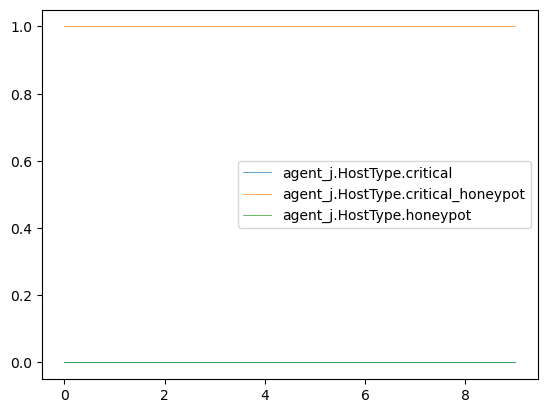

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action agent_j.action
0                1.0                 0.0      DecoyAccount      FileRecon
1                1.0                 0.0  RestrictAccPrivs   EnumAccounts
2                1.0                 0.0               Nop      FileRecon
3                1.0                 0.0               Nop           Exit
4                1.0                 0.0               Nop            Nop
5                1.0                 0.0               Nop            Nop
6                1.0                 0.0           LogIOCs            Nop
7                1.0                 0.0               Nop            Nop
8                1.0                 0.0               Nop            Nop
9                1.0                 0.0               Nop            Nop

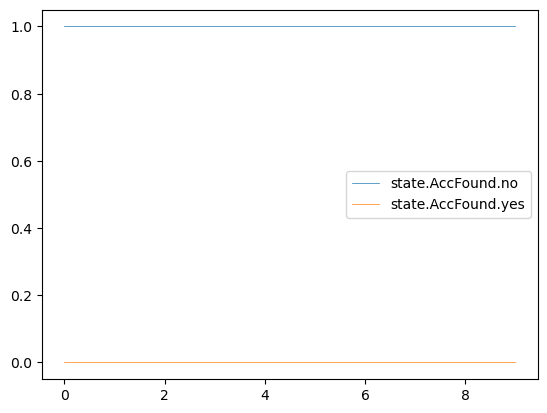

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action agent_j.action  \
0             1.000000              0.000000      DecoyAccount      FileRecon   
1             1.000000              0.000000  RestrictAccPrivs   EnumAccounts   
2             0.784000              0.216000               Nop      FileRecon   
3             0.200004              0.799996               Nop           Exit   
4             0.342271              0.657729               Nop            Nop   
5             0.603517              0.396483               Nop            Nop   
6             0.387280              0.612720           LogIOCs            Nop   
7             0.389711              0.610288               Nop            Nop   
8             0.389758              0.610242               Nop            Nop   
9             0.389758              0.610242               Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                       file_write  
1                   login_activity  
2                       file_write  
3                             none  
4                             none  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                             none

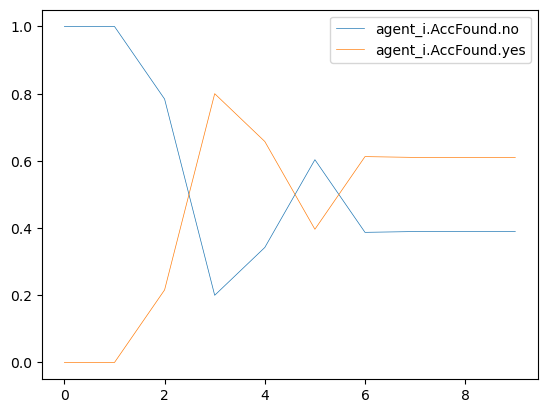

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action    agent_i.action  \
0             1.000000              0.000000      FileRecon      DecoyAccount   
1             1.000000              0.000000   EnumAccounts  RestrictAccPrivs   
2             0.931033              0.068967      FileRecon               Nop   
3             0.931033              0.068967           Exit               Nop   
4             0.931033              0.068967            Nop               Nop   
5             0.931033              0.068967            Nop               Nop   
6             0.931033              0.068967            Nop           LogIOCs   
7             0.931033              0.068967            Nop               Nop   
8             0.931033              0.068967            Nop               Nop   
9             0.931033              0.068967            Nop               Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                            auth                   user_files   
1                          denied                   user_files   
2                            auth                         none   
3                            auth                   user_files   
4                            auth                   user_files   
5                          denied                   user_files   
6                            auth                   user_files   
7                            auth                         none   
8                            auth                   user_files   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  
0                           failure                          active  
1                           failure                          active  
2                           failure                          active  
3                           success                      terminated  
4                           failure                      terminated  
5                           failure                      terminated  
6                           failure                      terminated  
7                           success                      terminated  
8                           success                      terminated  
9                           failure                      terminated

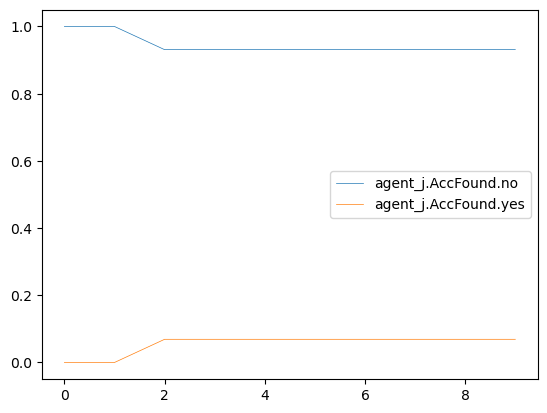

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0      DecoyAccount   
1                     0.0                     1.0  RestrictAccPrivs   
2                     0.0                     1.0               Nop   
3                     0.0                     1.0               Nop   
4                     0.0                     1.0               Nop   
5                     0.0                     1.0               Nop   
6                     0.0                     1.0           LogIOCs   
7                     0.0                     1.0               Nop   
8                     0.0                     1.0               Nop   
9                     0.0                     1.0               Nop   

  agent_j.action  
0      FileRecon  
1   EnumAccounts  
2      FileRecon  
3           Exit  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

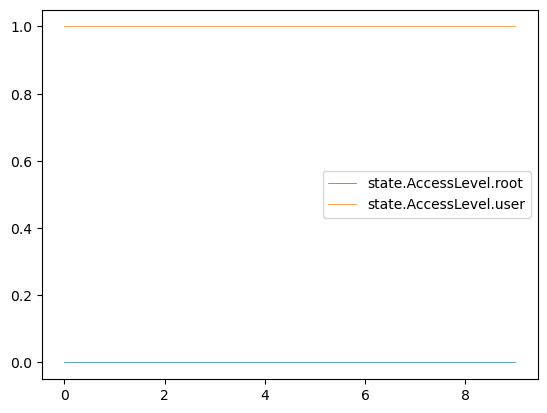

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000      DecoyAccount   
1                  0.000000                  1.000000  RestrictAccPrivs   
2                  0.000000                  1.000000               Nop   
3                  0.194400                  0.805600               Nop   
4                  0.511939                  0.488061               Nop   
5                  0.132465                  0.867535               Nop   
6                  0.443301                  0.556698           LogIOCs   
7                  0.439806                  0.560194               Nop   
8                  0.439740                  0.560260               Nop   
9                  0.439740                  0.560260               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                       file_write  
1   EnumAccounts                   login_activity  
2      FileRecon                       file_write  
3           Exit                             none  
4            Nop                             none  
5            Nop                       file_write  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

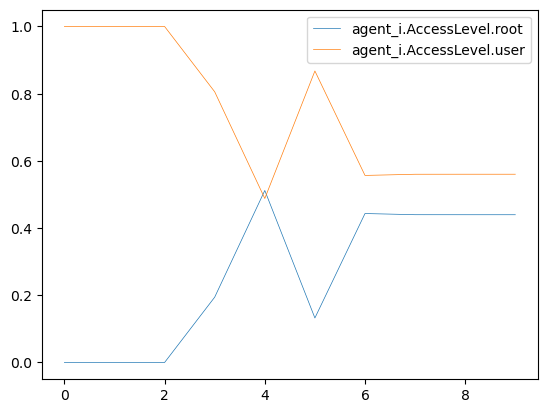

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0      FileRecon   
1                       0.0                       1.0   EnumAccounts   
2                       0.0                       1.0      FileRecon   
3                       0.0                       1.0           Exit   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                            auth   
5               Nop                          denied   
6           LogIOCs                            auth   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                   user_files                           success   
4                   user_files                           failure   
5                   user_files                           failure   
6                   user_files                           failure   
7                         none                           success   
8                   user_files                           success   
9                         none                           failure   

  agent_j.observation.ConnStatus'  
0                          active  
1                          active  
2                          active  
3                      terminated  
4                      terminated  
5                      terminated  
6                      terminated  
7                      terminated  
8                      terminated  
9                      terminated

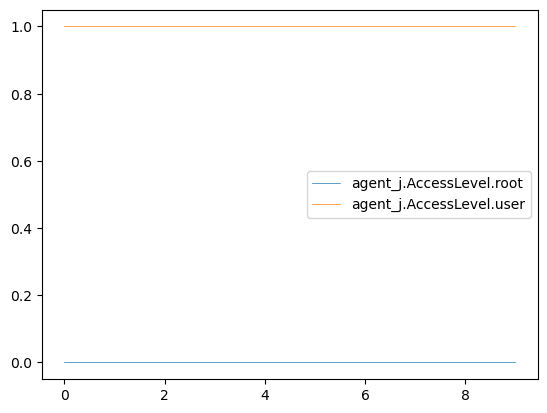

+++++++++++++++++++ End Interaction +++++++++++++++++++


In [7]:
# Get belief over opponent frames
def get_opponent_frame(dataframe):
    
    thetaj_columns = list(filter(lambda x: "thetaj" in x.split("."), dataframe))
    
    if len(thetaj_columns) > 0:
        return dataframe[thetaj_columns]
    
    else:
        return None

# Print and plot P(Theta_j)
def print_thetaj_belief(belief_thetaj_df, obs):
    df = pandas.concat([belief_thetaj_df, obs], axis=1)
    display(df)
    df.plot(linewidth=0.5)
    plotter.ylim(-0.1, 1.1)
    plotter.show()

# Summarize beliefs
def summarize_beliefs(state_vars, dataframe):
    print(f"+++++++++++++++++++ Begin Interaction +++++++++++++++++++")
    agent_i_data = filter_columns_by_agent(dataframe, "agent_i")
    agent_j_data = filter_columns_by_agent(dataframe, "agent_j")
    states = filter_columns_by_agent(dataframe, "state")
    
    actions_i = filter_columns_by_state(agent_i_data, "action")
    actions_j = filter_columns_by_state(agent_j_data, "action")
    
    obs_i = filter_columns_by_state(agent_i_data, "observation")
    obs_j = filter_columns_by_state(agent_j_data, "observation")
    
    i_belief_thetaj = get_opponent_frame(agent_i_data)
    if i_belief_thetaj is not None:
        print_thetaj_belief(i_belief_thetaj, obs_i)
    
    j_belief_thetaj = get_opponent_frame(agent_j_data)
    if j_belief_thetaj is not None:
        print_thetaj_belief(j_belief_thetaj, obs_j)
    
    for var in state_vars:
        print(f"============={var}============")
        # show state
        state_values = filter_columns_by_state(states, var)
        state_values = pandas.concat([state_values, actions_i, actions_j], axis = 1)
        display(state_values)
        state_values.plot(linewidth=0.5)
        plotter.show()
        
        # show agent i
        agent_i_beliefs = filter_columns_by_state(agent_i_data, var)
        agent_i_beliefs = pandas.concat([agent_i_beliefs, actions_i, actions_j, obs_i], axis = 1)
        display(agent_i_beliefs)
        agent_i_beliefs.plot(linewidth=0.5)
        plotter.show()
        
        # show agent j
        agent_j_beliefs = filter_columns_by_state(agent_j_data, var)
        agent_j_beliefs = pandas.concat([agent_j_beliefs, actions_j, actions_i, obs_j], axis = 1)
        display(agent_j_beliefs)
        agent_j_beliefs.plot(linewidth=0.5)
        plotter.show()
        print("==============================")
    
    print(f"+++++++++++++++++++ End Interaction +++++++++++++++++++")

# Use state data to figure out the state variables
def get_state_vars(columns):
    
    states = filter(lambda x: "state" in x.split(".") and len(x.split(".")) >= 2, columns)
    state_vars = map(lambda x: x.split(".")[1], states)
    
    return list(set(state_vars))

# Fetch dataframe with columns belonging to a particular agent
def filter_columns_by_agent(dataframe, name):
    columns = dataframe.columns
    filtered_columns = list(filter(lambda x: name in x.split("."), columns))
    
    df = dataframe[filtered_columns]
    return df

# Get columns containing the state name in the header
def filter_columns_by_state(dataframe, state):
    filtered_columns = list(filter(lambda x: state in x.split("."), dataframe.columns))
    return dataframe[filtered_columns]

# Main loop to summarize all traces
for trace in TRACE_FILES:
    data = load_json(trace)
    
    dataframe = pandas.json_normalize(data)    
    state_vars = get_state_vars(dataframe.columns)
    
    summarize_beliefs(state_vars, dataframe)

    